# Degradation of a cutting blade

# CRISP DM Framework Based Analysis

# 1. Business Understanding
<p>
    <ul>Vega HT is the shrink-wrap packer proposed by OCME. The various Vega HT models operate with single, double or triple track, according to the processed product and pack configuration</ul>
    <ul>It is deployed in large production lines in the food and beverage industry.</ul>
    <ul>The machine groups loose bottles or cans into set package sizes, wraps them in plastic film and then heat-shrinks the plastic film to combine them into a package. The plastic film is fed into the machine from large spools and is then cut to the length needed to wrap the film around a pack of goods. The cutting assembly is an important component of the machine to meet the high availability target. Therefore, the blade needs to be set-up and maintained properly</ul>
    <ul>Furthermore, the blade can not be inspected visually during operation due to the blade being enclosed in a metal housing and its fast rotation speed. Monitoring the cutting blades degradation will increase the machines reliability and reduce unexpected downtime caused by failed cuts.</ul>
</p>
<p><b>AIM</b>
    <ul>To show the degradation of the component over the course of the year.</ul>
    <ul>To find if the wear can be predicted accurately, and hence its remaining useful life prediction can be made in order to determine when it needs to be replaced.</ul>
    <ul>To find out if there is any effet of the modes of operation by time series analysis<ul>
</p>

# 2. Data Understanding
<p>
    <ul>The 519 files in the dataset are of the format MM-DDTHHMMSSNUMmodeX.csv, where MM is the month ranging from 1-12 (not calendar month), DD is the day of the month, HHMMSS is the start time of day of recording, NUM is the sample number and X is a mode ranging from 1-8.</ul>
    <ul>Each file is approximately 8 second sample with a time resolution of 4ms.</ul>
</p>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas_profiling import ProfileReport

In [2]:
# Lets begin by understanding one particular csv file
data1 = pd.read_csv('./Data/01-04T184148_000_mode1.csv')

In [3]:
data1.head()

,timestamp,pCut::Motor_Torque,pCut::CTRL_Position_controller::Lag_error,pCut::CTRL_Position_controller::Actual_position,pCut::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Actual_position,pSvolFilm::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Lag_error,pSpintor::VAX_speed
0,0.008,0.199603,0.027420,628392628,-920.104980,5298555,2441.235352,0.899543,1379.999756
1,0.012,0.281624,0.002502,628392625,-937.271118,5298565,2453.819092,0.874072,1379.999756
2,0.016,0.349315,-0.018085,628392621,-951.004028,5298575,2476.469727,0.879806,1379.999756
3,0.020,0.444450,-0.054680,628392617,-1019.668579,5298585,2501.637207,0.837500,1379.999756
4,0.024,0.480923,-0.042770,628392613,-1023.101807,5298595,2519.254395,0.905347,1379.999756


In [4]:
data1.shape

(2048, 9)

In [5]:
data1.describe()

,timestamp,pCut::Motor_Torque,pCut::CTRL_Position_controller::Lag_error,pCut::CTRL_Position_controller::Actual_position,pCut::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Actual_position,pSvolFilm::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Lag_error,pSpintor::VAX_speed
count,2048.000000,2048.000000,2048.000000,2.048000e+03,2048.000000,2.048000e+03,2048.000000,2048.000000,2048.000000
mean,4.102000,-0.097996,-0.000040,6.283972e+08,1293.845632,5.312998e+06,3306.292904,0.861009,1340.743343
std,2.365404,0.486380,0.093027,3.781230e+03,3486.164460,7.973948e+03,1073.549240,0.109760,73.928099
min,0.008000,-4.918202,-1.238697,6.283903e+08,-4895.782227,5.298555e+06,1988.222778,0.029616,1199.999634
25%,2.055000,-0.323410,-0.019238,6.283944e+08,-1264.286041,5.306144e+06,2325.465576,0.788474,1379.999756
50%,4.102000,-0.132881,0.000262,6.283975e+08,1435.089111,5.313704e+06,2965.975464,0.856501,1379.999756
75%,6.149000,0.270321,0.020106,6.283998e+08,3739.643005,5.320255e+06,4580.462402,0.943701,1379.999756
max,8.195999,1.006111,0.915148,6.284035e+08,7673.263184,5.325625e+06,4718.883301,1.146765,1379.999756


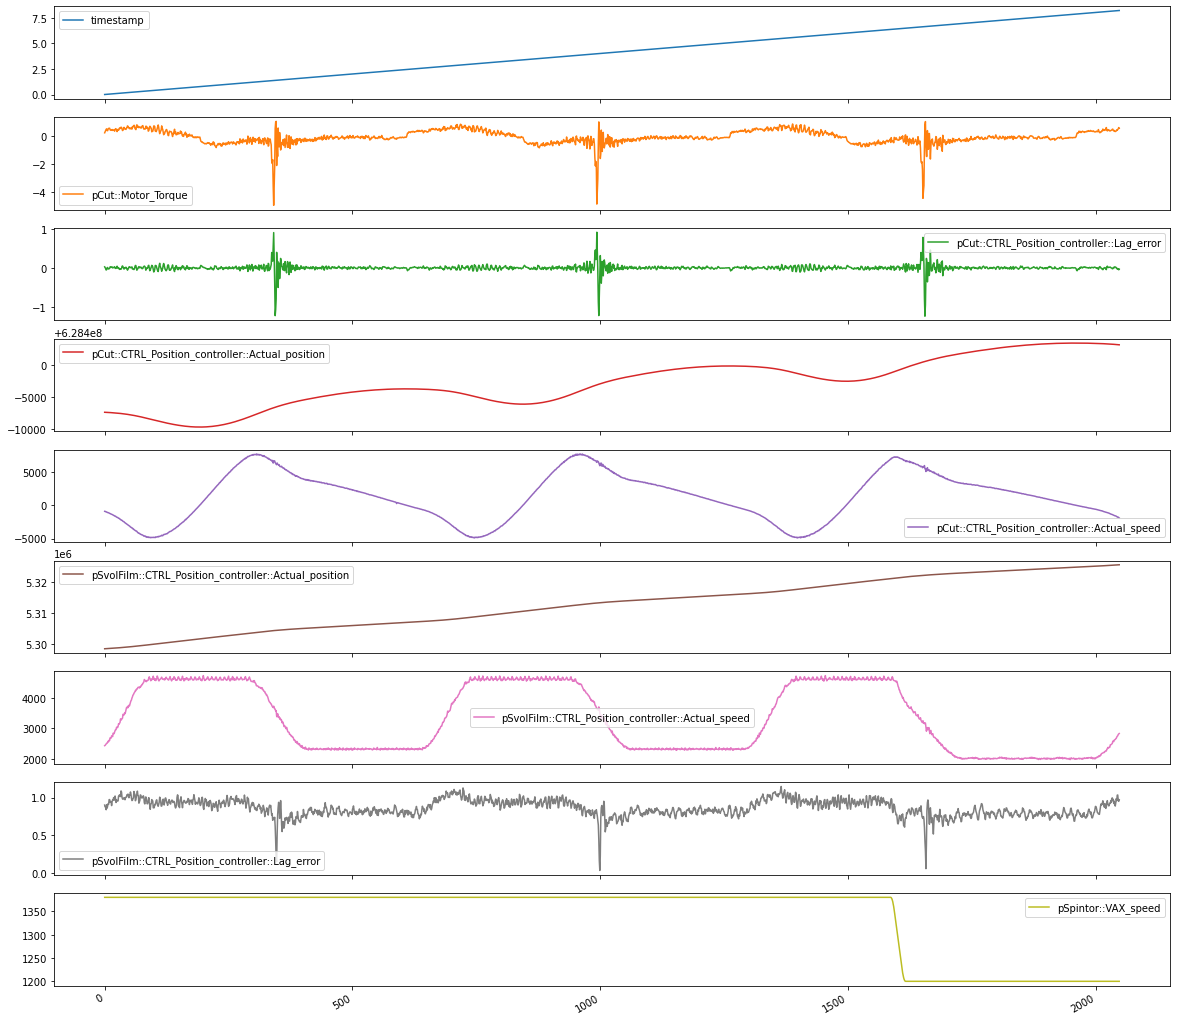

In [6]:
# Visualising the given data
data1.plot(subplots=True, figsize=(20,20))
plt.show()

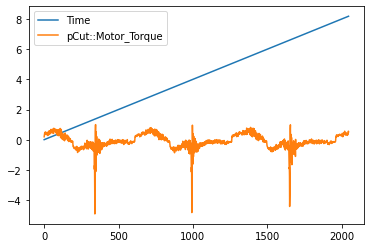

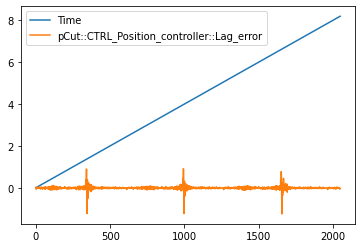

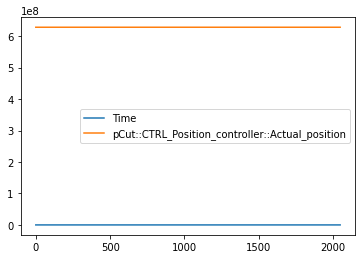

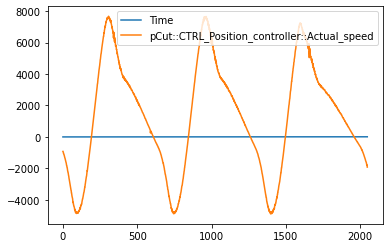

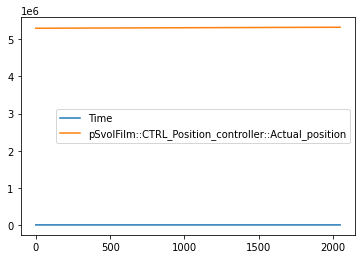

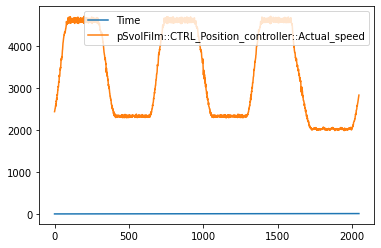

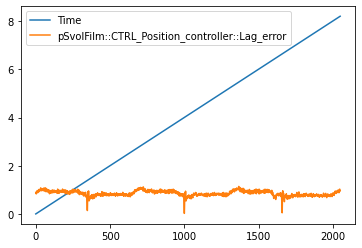

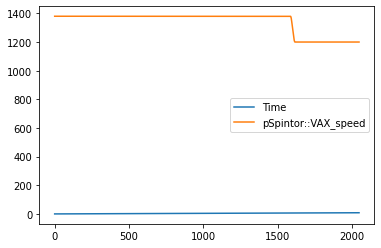

In [7]:
# Now let's analyse each feature wrt to the time 

timestamp = list(data1['timestamp'])
for i in range(1, data1.shape[1]):
    plt.plot(list(data1['timestamp']))
    plt.plot(list(data1.iloc[:, i]))
    plt.legend(['Time', data1.columns[i]])
    plt.show()

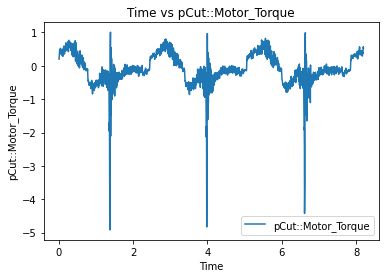

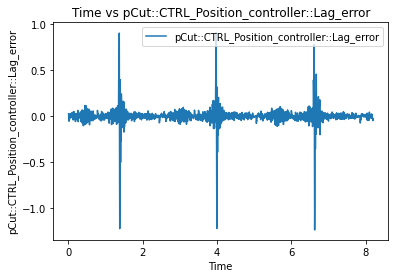

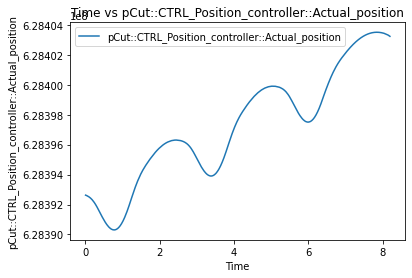

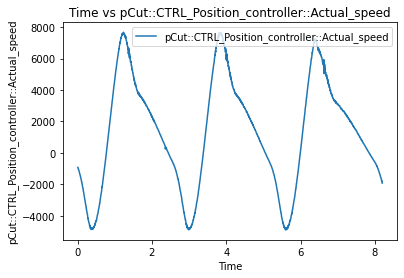

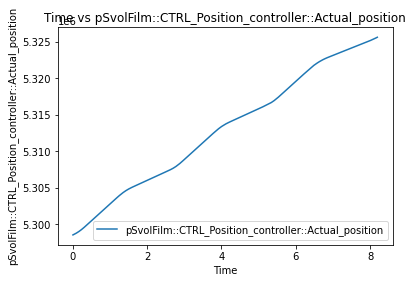

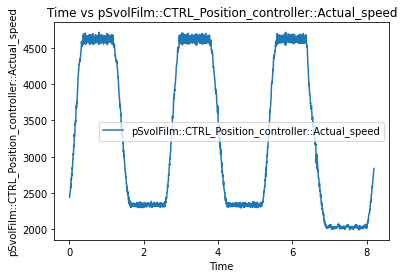

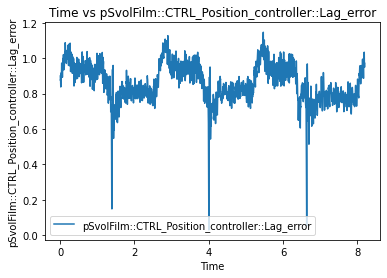

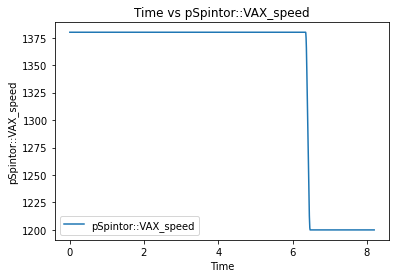

In [8]:
# Visulasing each feature wrt time elapsed
  
for col in data1.columns:
    if col != 'timestamp':
        data1.plot(x='timestamp', y=col)
        plt.title('Time vs '+ col)
        plt.xlabel('Time')
        plt.ylabel(col)
        plt.show()

In [8]:
# Let's now move on to analyse the same on a larger scale for all the given csv files

files = []
for r, d, f in os.walk('./Data'):
   for item in f:
    files.append(os.path.join(r, item))

In [9]:
full_data = pd.DataFrame()

In [10]:
for file in files:
    df = pd.read_csv(file)
    
    s = str(file[7:29])
    df['Mode'] = int(s[21])
    final_time = []
    for i in df.index:
        t = str(df['timestamp'][i])
        t_list = t.split('.')
        month = s[0:2]
        date = s[3:5]
        hour = s[6:8]
        minute = s[8:10]
        second = str(int(s[10:12]) + int(t_list[0]))
        if int(second) > 59:
            minute = str(int(minute) + 1)
            second = '0'
        if int(minute) > 59:
            hour = str(int(hour) + 1)
            minute = '0'
        millisecond = t_list[1][:3]
        time = "2000/" + month + "/" + date + " " + hour + ":" + minute + ":" + second + "." + millisecond
        # time = datetime.strptime(time, "%Y/%m/%d %H:%M:%S.%f")
        # print(time)
        final_time.append(time)
    df.insert(0, 'Time', final_time)
    full_data = full_data.append(df, ignore_index = True)

In [11]:
full_data

,Time,timestamp,pCut::Motor_Torque,pCut::CTRL_Position_controller::Lag_error,pCut::CTRL_Position_controller::Actual_position,pCut::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Actual_position,pSvolFilm::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Lag_error,pSpintor::VAX_speed,Mode
0,2000/01/04 18:41:48.008,0.008000,0.199603,0.027420,628392628,-920.104980,5298555,2441.235352,0.899543,1379.999756,1
1,2000/01/04 18:41:48.011,0.012000,0.281624,0.002502,628392625,-937.271118,5298565,2453.819092,0.874072,1379.999756,1
2,2000/01/04 18:41:48.015,0.016000,0.349315,-0.018085,628392621,-951.004028,5298575,2476.469727,0.879806,1379.999756,1
3,2000/01/04 18:41:48.019,0.020000,0.444450,-0.054680,628392617,-1019.668579,5298585,2501.637207,0.837500,1379.999756,1
4,2000/01/04 18:41:48.023,0.024000,0.480923,-0.042770,628392613,-1023.101807,5298595,2519.254395,0.905347,1379.999756,1
...,...,...,...,...,...,...,...,...,...,...,...
1062907,2000/12/28 18:59:17.179,8.179999,-0.277697,-0.023948,194924473,7220.077148,11693928,4610.663086,0.958136,1499.999756,2
1062908,2000/12/28 18:59:17.183,8.183999,-0.285098,-0.022138,194924502,7257.842773,11693946,4618.213379,0.971821,1499.999756,2
1062909,2000/12/28 18:59:17.187,8.187999,-0.155192,-0.034412,194924531,7371.139160,11693964,4582.979004,0.981734,1499.999756,2
1062910,2000/12/28 18:59:17.191,8.191999,-0.371426,0.031594,194924560,7360.839844,11693983,4615.696777,0.987367,1499.999756,2


<b>Column Names</b>
<p>
    <ul>pCut::Motor_Torque => Torque in nM</ul>
    <ul>pCut::CTRL_Position_controller::Lag_error => Represent the instantaneous position error between the set-point from the path generator and the real current encoder position of the motor</ul>
    <ul>pCut::CTRL_Position_controller::Actual_position => Cutting blade position in mm</ul>
    <ul>pCut::CTRL_Position_controller::Actual_speed => Speed of the cutting blade</ul>
    <ul>pSvolFilm::CTRL_Position_controller::Actual_position => Plastic film unwinder position in mm</ul>
    <ul>pSvolFilm::CTRL_Position_controller::Actual_speed => Speed of the plastic film unwinder</ul>
    <ul>pSvolFilm::CTRL_Position_controller::Lag_error => Represent the instantaneous position error between the set-point from the path generator and the real current encoder position of the motor</ul>
    <ul>pSpintor::VAX_speed => VAX measurement of performance</ul>
</p>

In [12]:
full_data.rename(columns={"timestamp":"Time Elapsed",
                         "pCut::Motor_Torque":"CutMotorTorque",
                         "pCut::CTRL_Position_controller::Lag_error": "CutLagError",
                         "pCut::CTRL_Position_controller::Actual_position" :"CutActualPosition",
                         "pCut::CTRL_Position_controller::Actual_speed":"CutActualSpeed",
                         "pSvolFilm::CTRL_Position_controller::Actual_position":"FilmActualPosition",
                         "pSvolFilm::CTRL_Position_controller::Actual_speed":"FilmActualSpeed",
                         "pSvolFilm::CTRL_Position_controller::Lag_error":"FilmLagError",
                         "pSpintor::VAX_speed":"VAXSpeed"},
                inplace=True)

In [13]:
full_data.head()

,Time,Time Elapsed,CutMotorTorque,CutLagError,CutActualPosition,CutActualSpeed,FilmActualPosition,FilmActualSpeed,FilmLagError,VAXSpeed,Mode
0,2000/01/04 18:41:48.008,0.008,0.199603,0.027420,628392628,-920.104980,5298555,2441.235352,0.899543,1379.999756,1
1,2000/01/04 18:41:48.011,0.012,0.281624,0.002502,628392625,-937.271118,5298565,2453.819092,0.874072,1379.999756,1
2,2000/01/04 18:41:48.015,0.016,0.349315,-0.018085,628392621,-951.004028,5298575,2476.469727,0.879806,1379.999756,1
3,2000/01/04 18:41:48.019,0.020,0.444450,-0.054680,628392617,-1019.668579,5298585,2501.637207,0.837500,1379.999756,1
4,2000/01/04 18:41:48.023,0.024,0.480923,-0.042770,628392613,-1023.101807,5298595,2519.254395,0.905347,1379.999756,1


In [15]:
full_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time Elapsed,1062912.0,4.102069e+00,2.364827e+00,4.000000e-03,2.056000e+00,4.104000e+00,6.152000e+00,8.199999e+00
CutMotorTorque,1062912.0,-1.206338e-01,6.078708e-01,-6.560303e+00,-3.696310e-01,-1.187128e-01,2.546913e-01,3.856873e+00
CutLagerror,1062912.0,-5.472746e-05,1.212122e-01,-1.888258e+00,-2.201461e-02,6.456900e-04,2.380830e-02,2.021531e+00
CutActualPosition,1062912.0,3.371415e+08,5.466868e+08,-2.039056e+09,8.626082e+07,1.919407e+08,5.691639e+08,1.911789e+09
CutActualSpeed,1062912.0,1.945795e+03,4.873922e+03,-9.482574e+03,-1.908875e+03,2.595520e+03,5.441666e+03,1.792831e+04
FilmActualPosition,1062912.0,1.488169e+08,2.711355e+08,1.936250e+05,2.136702e+07,7.259557e+07,1.602507e+08,1.453671e+09
FilmActualSpeed,1062912.0,5.367032e+03,3.382194e+03,-2.013385e+01,3.032669e+03,4.582979e+03,5.823731e+03,1.797202e+04
FilmLagError,1062912.0,9.847591e-01,3.437204e-01,-9.143658e-01,8.384416e-01,9.711797e-01,1.105926e+00,3.567880e+00
VAXSpeed,1062912.0,1.927328e+03,6.559047e+02,0.000000e+00,1.500000e+03,1.800000e+03,2.280000e+03,3.600000e+03
Mode,1062912.0,2.323699e+00,1.649207e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,8.000000e+00


In [16]:
full_data.groupby('Mode').describe().transpose()

Mode                            1              2              3             4  \
Time Elapsed count  468992.000000  247808.000000  143360.000000  24576.000000   
             mean        4.102052       4.102000       4.102000      4.102000   
             std         2.364829       2.364831       2.364835      2.364874   
             min         0.004000       0.008000       0.004000      0.008000   
             25%         2.056000       2.055000       2.055000      2.055000   
...                           ...            ...            ...           ...   
VAXSpeed     min      1199.999634       0.000000    1319.999634   1319.999634   
             25%      1499.999756    1379.999756    2039.999634   2699.999512   
             50%      1499.999756    1379.999756    2699.999023   2849.999512   
             75%      1799.999756    1799.999756    2699.999512   3599.999512   
             max      3299.999512    1799.999756    2699.999512   3599.999512   

Mode                            5             6            7             8  
Time Elapsed count  122880.000000  36864.000000  6144.000000  12288.000000  
             mean        4.102266      4.102444     4.102000      4.102000  
             std         2.364836      2.364859     2.365019      2.364922  
             min         0.008000      0.008000     0.008000      0.008000  
             25%         2.056000      2.056000     2.055000      2.055000  
...                           ...           ...          ...           ...  
VAXSpeed     min      1499.999756   1319.999634  2999.999512   3479.999512  
             25%      2999.999512   1679.999634  2999.999512   3479.999512  
             50%      3179.999512   1919.999695  2999.999512   3479.999512  
             75%      3299.999512   2999.999512  2999.999512   3479.999512  
             max      3299.999512   2999.999512  2999.999512   3479.999512  

[72 rows x 8 columns]

<b>Understanding the data visually </b>

CutMotorTorque


c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


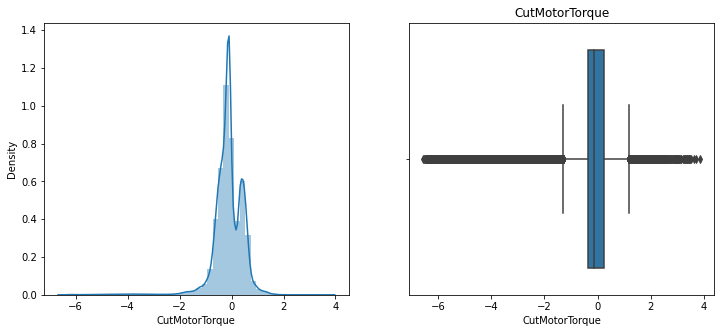

CutLagerror


c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


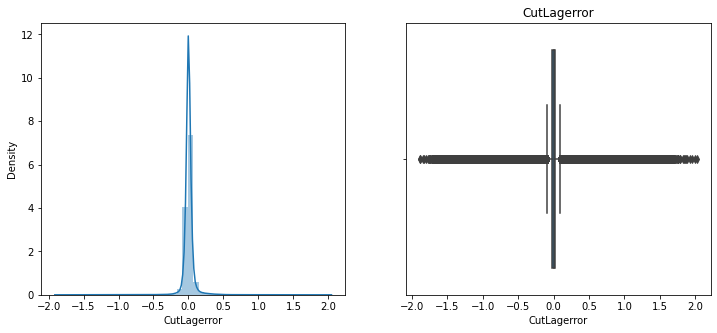

CutActualPosition


c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


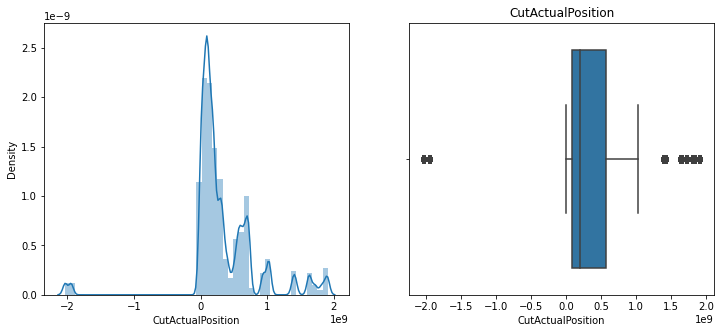

CutActualSpeed


c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


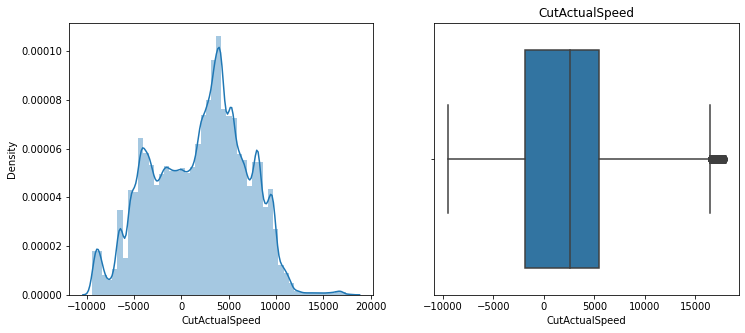

FilmActualPosition


c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


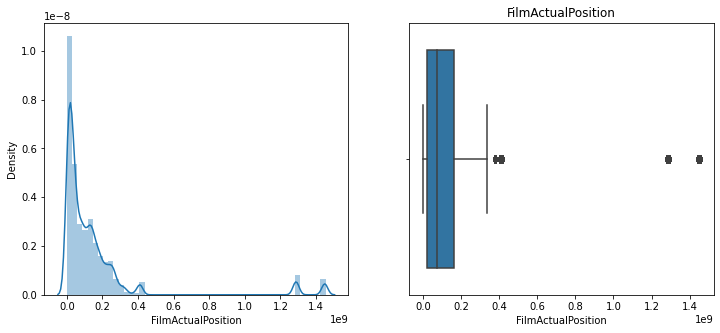

FilmActualSpeed


c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


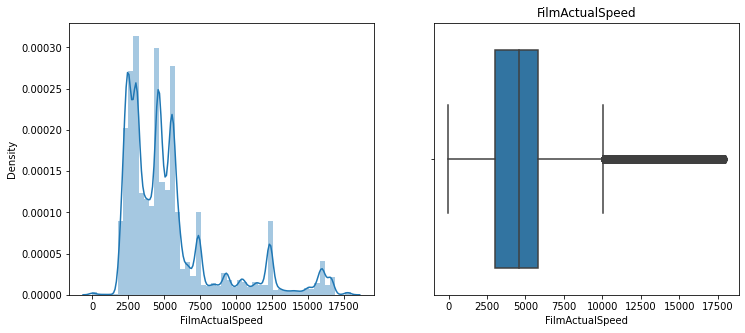

FilmLagError


c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


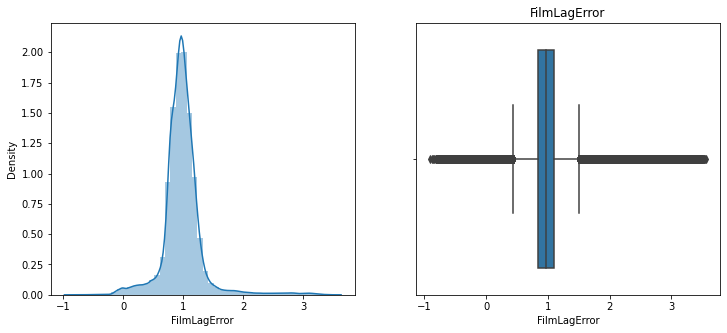

VAXSpeed


c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


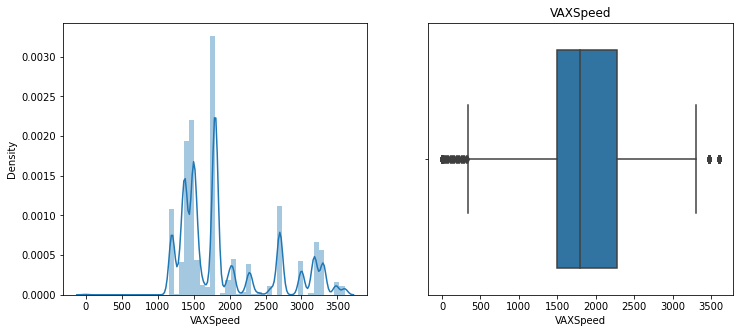

In [17]:
features = full_data.columns
for feature in features:
    if feature == 'Time' or feature =='Time Elapsed' or feature == 'Mode':
        continue
    else:
        print(feature)
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        sns.distplot(full_data[feature], ax=axes[0])
        sns.boxplot(full_data[feature], ax=axes[1])
        plt.title(feature)
        plt.show()

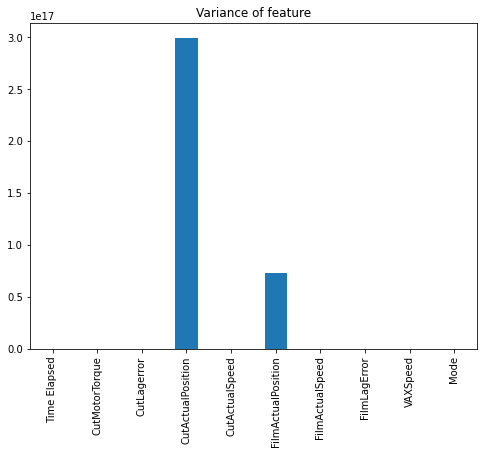

In [18]:
# Visualising variance for each feature 
features = full_data.columns
full_data[features].var().plot(kind="bar",figsize=(8,6), title="Variance of feature")
plt.show()

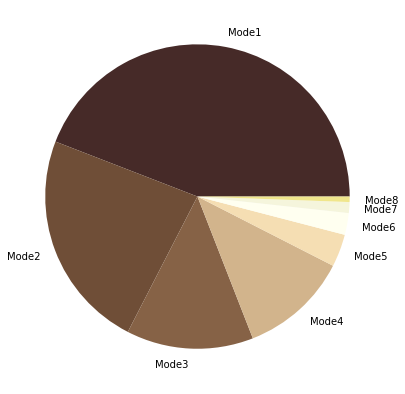

In [19]:
# Visualising the modes
mode_counts = full_data['Mode'].value_counts()

counts = [x for x in mode_counts.values]
labels = ['Mode1', 'Mode2', 'Mode3', 'Mode4', 'Mode5', 'Mode6', 'Mode7', 'Mode8']
colors = ['#462A28', '#6F4E37', '#866246', 'tan','wheat','ivory', 'beige', 'khaki']

fig = plt.figure(figsize =(10, 7)) 
plt.pie(counts, labels=labels, colors=colors) 
plt.show()

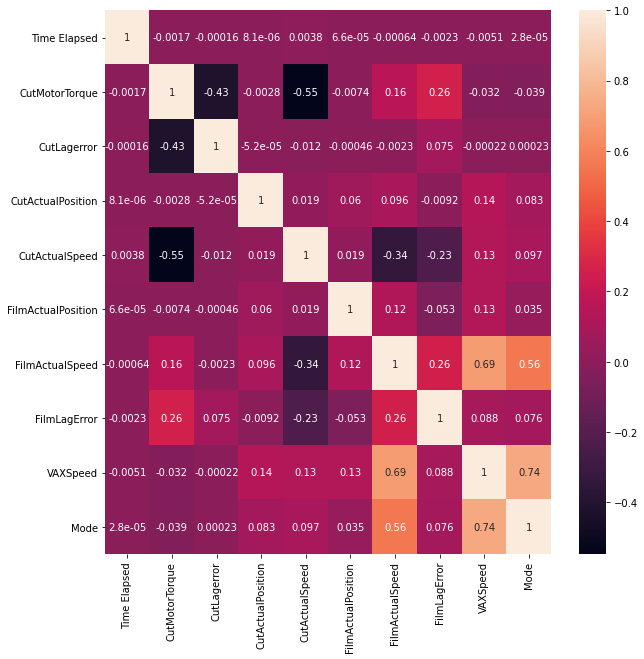

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(full_data.corr(), ax=ax, annot=True)
plt.show()

# 3. Modelling

# a) Sklearn Implementation of DBSCAN
Density-Based Spatial Clustering of Applications with Noise

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [22]:
dbscan_data = full_data.copy()
dbscan_data = dbscan_data[:10000]

In [23]:
dbscan_data

,Time,Time Elapsed,CutMotorTorque,CutLagerror,CutActualPosition,CutActualSpeed,FilmActualPosition,FilmActualSpeed,FilmLagError,VAXSpeed,Mode
0,2000/01/04 18:41:48.008,0.008000,0.199603,0.027420,628392628,-920.104980,5298555,2441.235352,0.899543,1379.999756,1
1,2000/01/04 18:41:48.011,0.012000,0.281624,0.002502,628392625,-937.271118,5298565,2453.819092,0.874072,1379.999756,1
2,2000/01/04 18:41:48.015,0.016000,0.349315,-0.018085,628392621,-951.004028,5298575,2476.469727,0.879806,1379.999756,1
3,2000/01/04 18:41:48.019,0.020000,0.444450,-0.054680,628392617,-1019.668579,5298585,2501.637207,0.837500,1379.999756,1
4,2000/01/04 18:41:48.023,0.024000,0.480923,-0.042770,628392613,-1023.101807,5298595,2519.254395,0.905347,1379.999756,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,2000/01/04 18:53:0.219,7.220000,-0.276328,-0.074609,629074147,5788.421387,6986737,3181.156494,0.729632,1379.999756,1
9996,2000/01/04 18:53:0.223,7.223999,-0.098007,-0.111514,629074169,5730.056641,6986750,3168.572754,0.747087,1379.999756,1
9997,2000/01/04 18:53:0.227,7.228000,-0.110820,-0.087996,629074192,5661.392090,6986763,3254.141602,0.677096,1379.999756,1
9998,2000/01/04 18:53:0.231,7.231999,-0.794473,0.151855,629074214,5575.561523,6986776,3148.438721,0.645075,1379.999756,1


In [24]:
dbscan_data = dbscan_data.drop(['Time', 'Time Elapsed'],axis=1)

In [25]:
dbscan_data

,CutMotorTorque,CutLagerror,CutActualPosition,CutActualSpeed,FilmActualPosition,FilmActualSpeed,FilmLagError,VAXSpeed,Mode
0,0.199603,0.027420,628392628,-920.104980,5298555,2441.235352,0.899543,1379.999756,1
1,0.281624,0.002502,628392625,-937.271118,5298565,2453.819092,0.874072,1379.999756,1
2,0.349315,-0.018085,628392621,-951.004028,5298575,2476.469727,0.879806,1379.999756,1
3,0.444450,-0.054680,628392617,-1019.668579,5298585,2501.637207,0.837500,1379.999756,1
4,0.480923,-0.042770,628392613,-1023.101807,5298595,2519.254395,0.905347,1379.999756,1
...,...,...,...,...,...,...,...,...,...
9995,-0.276328,-0.074609,629074147,5788.421387,6986737,3181.156494,0.729632,1379.999756,1
9996,-0.098007,-0.111514,629074169,5730.056641,6986750,3168.572754,0.747087,1379.999756,1
9997,-0.110820,-0.087996,629074192,5661.392090,6986763,3254.141602,0.677096,1379.999756,1
9998,-0.794473,0.151855,629074214,5575.561523,6986776,3148.438721,0.645075,1379.999756,1


In [26]:
# scaling the data to make all values lie between the maximum and minimum value
scaler = MinMaxScaler() 
scaled_data = scaler.fit_transform(dbscan_data.iloc[:,0:8])
scaled_data = pd.DataFrame(scaled_data, columns = dbscan_data.columns[0:8])

In [27]:
scaled_data

,CutMotorTorque,CutLagerror,CutActualPosition,CutActualSpeed,FilmActualPosition,FilmActualSpeed,FilmLagError,VAXSpeed
0,0.820350,0.625878,0.003397,0.315789,0.000000,0.506782,0.781474,1.0
1,0.833224,0.616208,0.003392,0.314426,0.000006,0.509495,0.758959,1.0
2,0.843849,0.608217,0.003386,0.313335,0.000012,0.514379,0.764028,1.0
3,0.858781,0.594015,0.003380,0.307881,0.000018,0.519805,0.726632,1.0
4,0.864506,0.598637,0.003375,0.307608,0.000024,0.523603,0.786604,1.0
...,...,...,...,...,...,...,...,...
9995,0.745649,0.586280,0.999870,0.848650,0.999970,0.666305,0.631284,1.0
9996,0.773638,0.571957,0.999902,0.844014,0.999977,0.663592,0.646713,1.0
9997,0.771627,0.581085,0.999936,0.838560,0.999985,0.682040,0.584847,1.0
9998,0.664321,0.674172,0.999968,0.831743,0.999993,0.659251,0.556542,1.0


In [28]:
clusters  = DBSCAN(eps = 0.2, metric='euclidean', min_samples = 5, n_jobs = -1).fit_predict(scaled_data)

[0 0 0 ... 5 5 5]


Text(0.5, 1.0, 'Clust Counts')

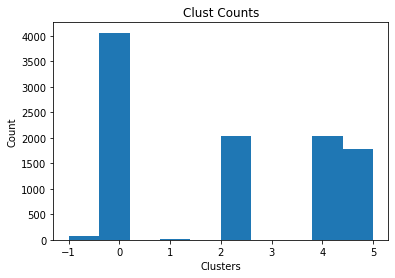

In [29]:
print(clusters)
plt.hist(clusters)
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.title('Clust Counts')

In [30]:
dbscan_data['Anomaly'] = list(clusters)

In [31]:
dbscan_data

,CutMotorTorque,CutLagerror,CutActualPosition,CutActualSpeed,FilmActualPosition,FilmActualSpeed,FilmLagError,VAXSpeed,Mode,Anomaly
0,0.199603,0.027420,628392628,-920.104980,5298555,2441.235352,0.899543,1379.999756,1,0
1,0.281624,0.002502,628392625,-937.271118,5298565,2453.819092,0.874072,1379.999756,1,0
2,0.349315,-0.018085,628392621,-951.004028,5298575,2476.469727,0.879806,1379.999756,1,0
3,0.444450,-0.054680,628392617,-1019.668579,5298585,2501.637207,0.837500,1379.999756,1,0
4,0.480923,-0.042770,628392613,-1023.101807,5298595,2519.254395,0.905347,1379.999756,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,-0.276328,-0.074609,629074147,5788.421387,6986737,3181.156494,0.729632,1379.999756,1,5
9996,-0.098007,-0.111514,629074169,5730.056641,6986750,3168.572754,0.747087,1379.999756,1,5
9997,-0.110820,-0.087996,629074192,5661.392090,6986763,3254.141602,0.677096,1379.999756,1,5
9998,-0.794473,0.151855,629074214,5575.561523,6986776,3148.438721,0.645075,1379.999756,1,5


In [32]:
dbscan_data['Anomaly'].unique()

array([ 0, -1,  1,  2,  3,  4,  5], dtype=int64)

In [33]:
x_anomaly = dbscan_data[dbscan_data['Anomaly'] == -1]
x_normal = dbscan_data[dbscan_data['Anomaly'] != -1]

In [34]:
labels = ['Anomalous', 'Non-anomalous']
anomaly_counts = [x_anomaly.shape[0], x_normal.shape[0]]

In [35]:
anomaly_counts

[72, 9928]

Text(0, 0.5, 'Count')

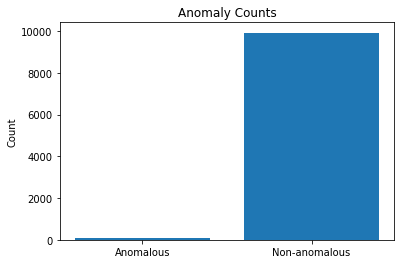

In [36]:
plt.bar(labels, anomaly_counts)
plt.title('Anomaly Counts')
plt.ylabel('Count')

In [37]:
dbscan_anomaly_index = dbscan_data[dbscan_data['Anomaly']==-1].index
normal_index = dbscan_data[dbscan_data['Anomaly']!=-1].index

In [38]:
dbscan_anomaly_index

Int64Index([ 340,  341,  342,  343,  344,  345,  346,  347,  993,  994,  995,
             996,  997,  998,  999, 1000, 1654, 1657, 2300, 2303, 2304, 3053,
            3803, 4593, 4594, 4595, 4596, 4597, 5344, 5345, 5346, 5347, 5348,
            5349, 6323, 6324, 6325, 6326, 6328, 6329, 6330, 6331, 6991, 6992,
            6994, 6995, 6996, 6997, 7643, 7644, 7646, 7647, 7648, 7649, 7650,
            8674, 8677, 8678, 8679, 8680, 8681, 9326, 9329, 9330, 9331, 9332,
            9978, 9980, 9981, 9982, 9983, 9984],
           dtype='int64')

In [39]:
normal_index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999],
           dtype='int64', length=9928)

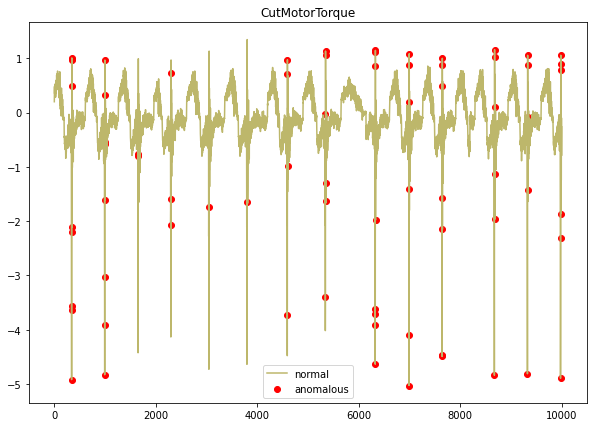

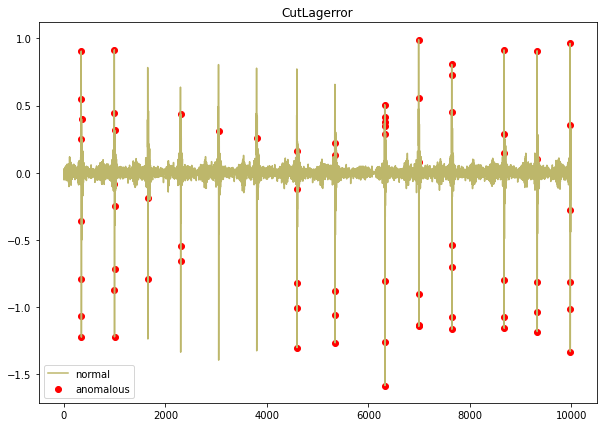

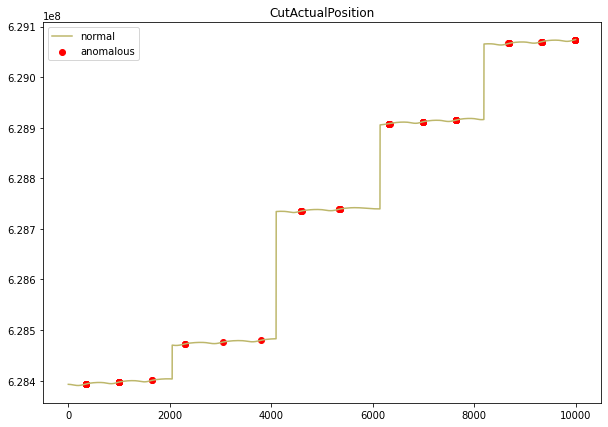

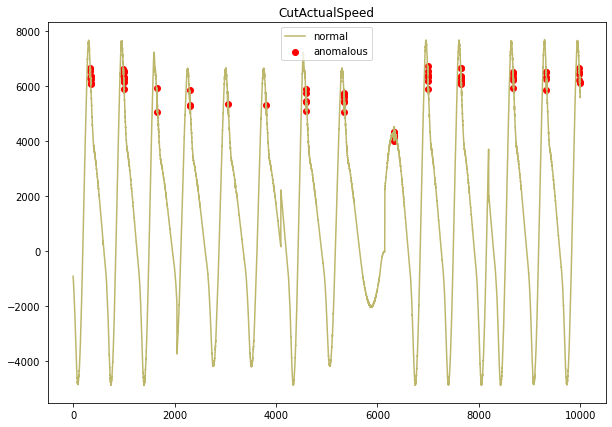

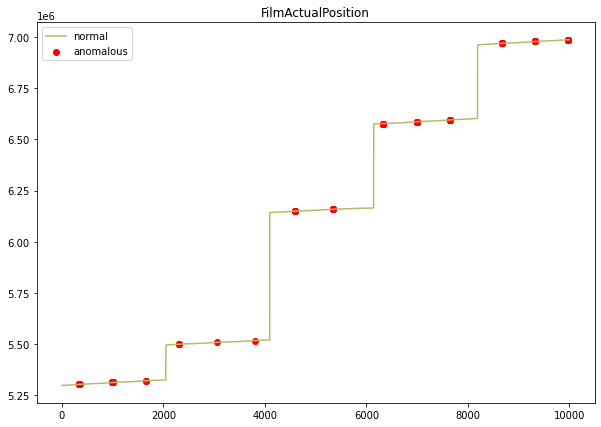

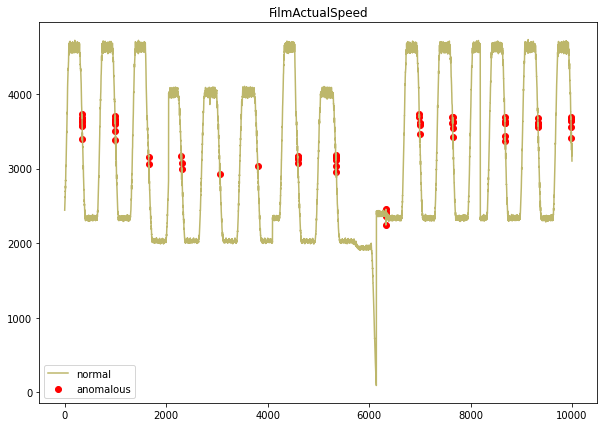

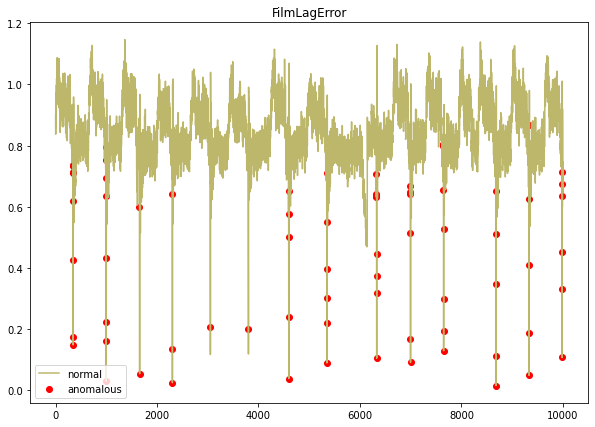

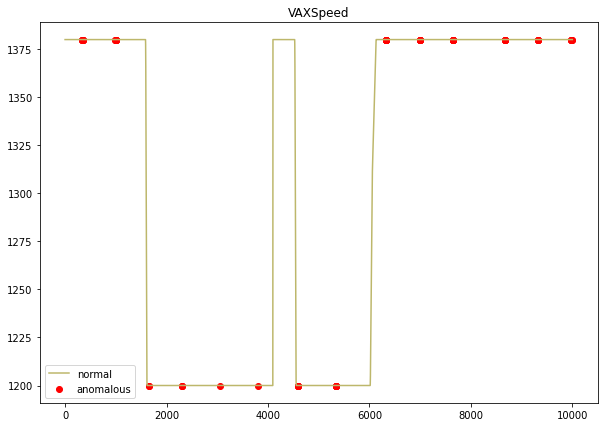

In [40]:
features = ['CutMotorTorque', 'CutLagerror', 'CutActualPosition', 'CutActualSpeed', 'FilmActualPosition', 'FilmActualSpeed', 'FilmLagError', 'VAXSpeed']
for feature in features:
    plt.figure(figsize=(10,7))
    plt.plot(dbscan_data[feature], color='darkkhaki', label = 'normal')
    plt.scatter(x=dbscan_data.iloc[dbscan_anomaly_index].index, y=dbscan_data.iloc[dbscan_anomaly_index][feature], color='red', label = 'anomalous')
    plt.title(feature)
    plt.legend()

# b) Isolation Forests

In [6]:
from sklearn.ensemble import IsolationForest

In [7]:
if_data = full_data.copy()
if_data = if_data[:10000]

In [43]:
if_data

,Time,Time Elapsed,CutMotorTorque,CutLagerror,CutActualPosition,CutActualSpeed,FilmActualPosition,FilmActualSpeed,FilmLagError,VAXSpeed,Mode
0,2000/01/04 18:41:48.008,0.008000,0.199603,0.027420,628392628,-920.104980,5298555,2441.235352,0.899543,1379.999756,1
1,2000/01/04 18:41:48.011,0.012000,0.281624,0.002502,628392625,-937.271118,5298565,2453.819092,0.874072,1379.999756,1
2,2000/01/04 18:41:48.015,0.016000,0.349315,-0.018085,628392621,-951.004028,5298575,2476.469727,0.879806,1379.999756,1
3,2000/01/04 18:41:48.019,0.020000,0.444450,-0.054680,628392617,-1019.668579,5298585,2501.637207,0.837500,1379.999756,1
4,2000/01/04 18:41:48.023,0.024000,0.480923,-0.042770,628392613,-1023.101807,5298595,2519.254395,0.905347,1379.999756,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,2000/01/04 18:53:0.219,7.220000,-0.276328,-0.074609,629074147,5788.421387,6986737,3181.156494,0.729632,1379.999756,1
9996,2000/01/04 18:53:0.223,7.223999,-0.098007,-0.111514,629074169,5730.056641,6986750,3168.572754,0.747087,1379.999756,1
9997,2000/01/04 18:53:0.227,7.228000,-0.110820,-0.087996,629074192,5661.392090,6986763,3254.141602,0.677096,1379.999756,1
9998,2000/01/04 18:53:0.231,7.231999,-0.794473,0.151855,629074214,5575.561523,6986776,3148.438721,0.645075,1379.999756,1


In [44]:
if_data = if_data.drop(['Time', 'Time Elapsed', 'Mode'],axis=1)

In [45]:
if_data

,CutMotorTorque,CutLagerror,CutActualPosition,CutActualSpeed,FilmActualPosition,FilmActualSpeed,FilmLagError,VAXSpeed
0,0.199603,0.027420,628392628,-920.104980,5298555,2441.235352,0.899543,1379.999756
1,0.281624,0.002502,628392625,-937.271118,5298565,2453.819092,0.874072,1379.999756
2,0.349315,-0.018085,628392621,-951.004028,5298575,2476.469727,0.879806,1379.999756
3,0.444450,-0.054680,628392617,-1019.668579,5298585,2501.637207,0.837500,1379.999756
4,0.480923,-0.042770,628392613,-1023.101807,5298595,2519.254395,0.905347,1379.999756
...,...,...,...,...,...,...,...,...
9995,-0.276328,-0.074609,629074147,5788.421387,6986737,3181.156494,0.729632,1379.999756
9996,-0.098007,-0.111514,629074169,5730.056641,6986750,3168.572754,0.747087,1379.999756
9997,-0.110820,-0.087996,629074192,5661.392090,6986763,3254.141602,0.677096,1379.999756
9998,-0.794473,0.151855,629074214,5575.561523,6986776,3148.438721,0.645075,1379.999756


In [46]:
rs = np.random.RandomState(0)
clf = IsolationForest(max_samples=100, random_state=rs, contamination=.1) 
clf.fit(if_data)

IsolationForest(contamination=0.1, max_samples=100,
                random_state=RandomState(MT19937) at 0x1F8C7E1A940)

In [47]:
if_scores = clf.decision_function(if_data)
if_anomalies = clf.predict(if_data)

In [48]:
if_scores

array([ 0.03891084,  0.04000322,  0.0258338 , ..., -0.01845137,
       -0.05034716,  0.01070228])

In [49]:
if_anomalies

array([ 1,  1,  1, ..., -1, -1,  1])

In [50]:
set(if_anomalies)

{-1, 1}

In [51]:
if_anomalies = pd.Series(if_anomalies).replace([-1,1],[1,0])

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Anomaly Scores')

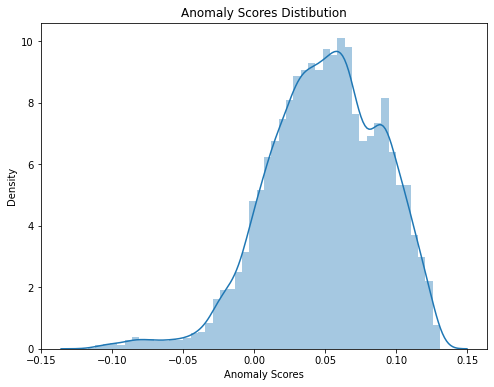

In [52]:
plt.figure(figsize=(8,6))
sns.distplot(if_scores)
plt.title('Anomaly Scores Distibution')
plt.xlabel('Anomaly Scores')

In [53]:
if_anomalies.value_counts()

0    9000
1    1000
dtype: int64

In [54]:
labels = ['Anomalous', 'Non-anomalous']
anomaly_counts = [if_anomalies.value_counts()[1], if_anomalies.value_counts()[0]]

Text(0, 0.5, 'Count')

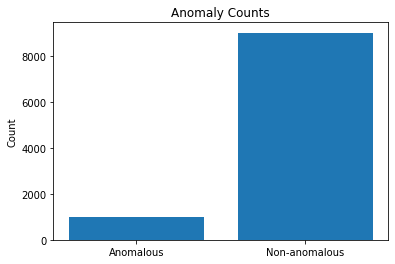

In [55]:
plt.bar(labels, anomaly_counts)
plt.title('Anomaly Counts')
plt.ylabel('Count')

In [56]:
if_anomaly_index = if_anomalies[if_anomalies==1].index

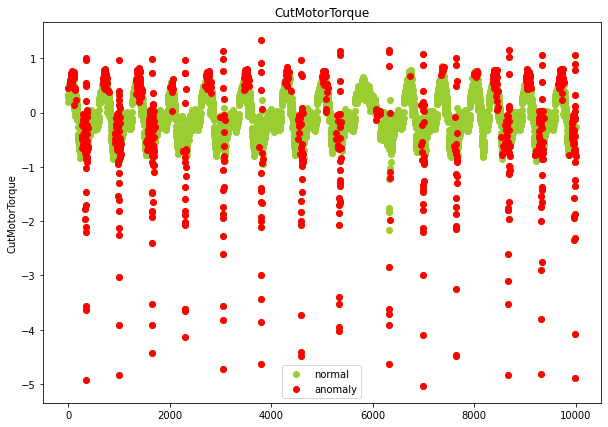

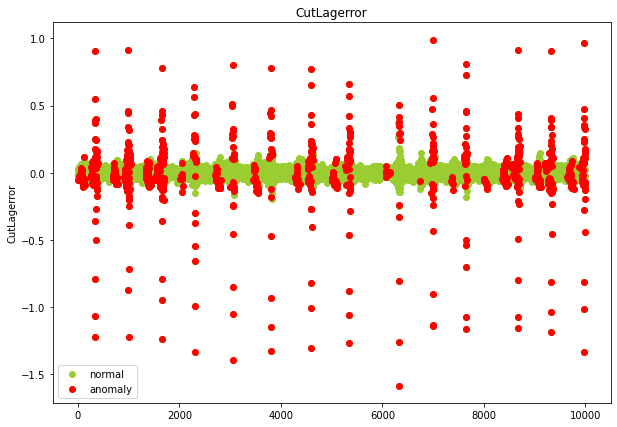

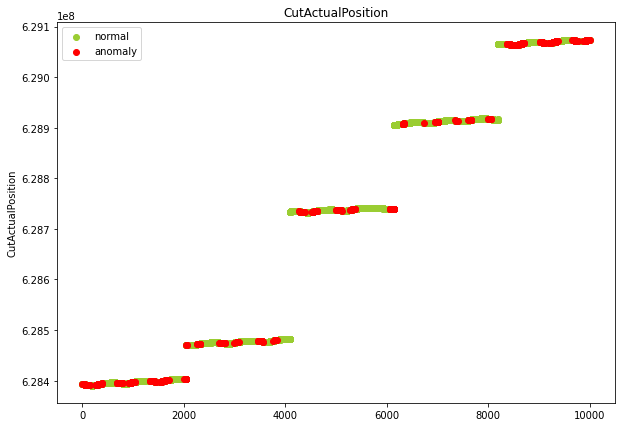

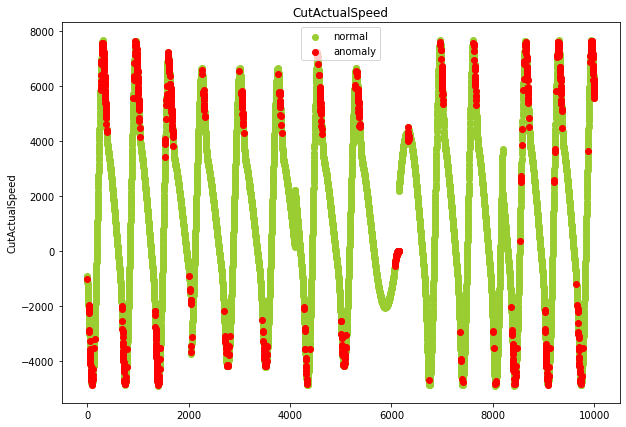

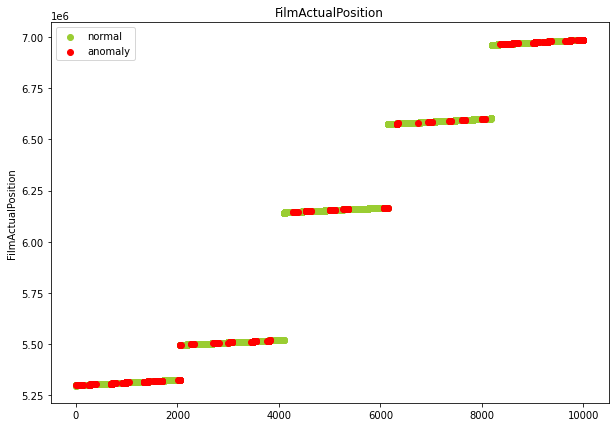

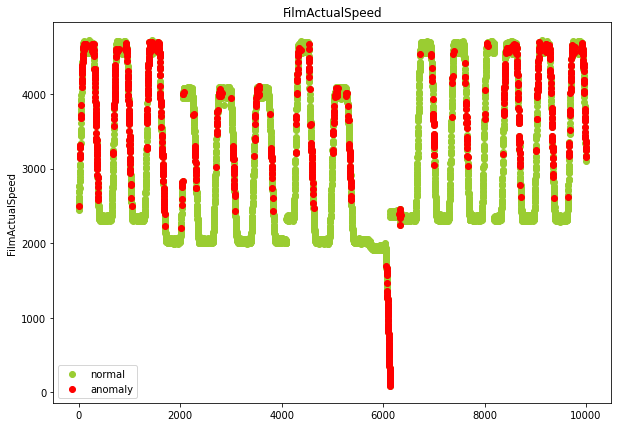

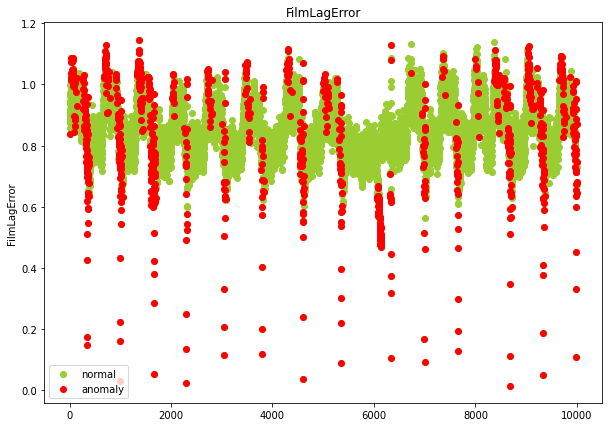

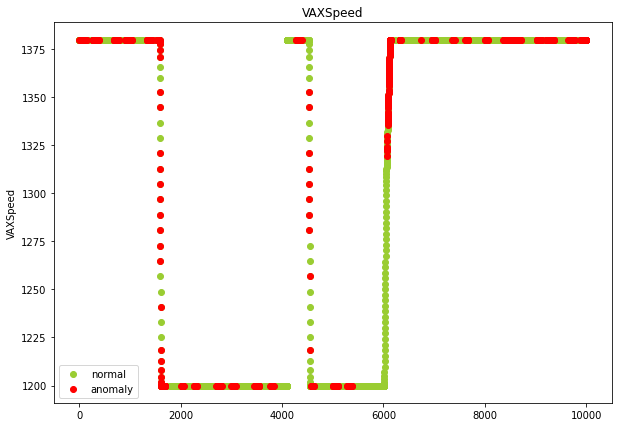

In [57]:
features = ['CutMotorTorque', 'CutLagerror', 'CutActualPosition', 'CutActualSpeed', 'FilmActualPosition', 'FilmActualSpeed', 'FilmLagError', 'VAXSpeed']
for feature in features:
    plt.figure(figsize=(10,7))
    plt.scatter(if_data.index,if_data[feature],c='yellowgreen', label = 'normal')
    plt.scatter(if_anomaly_index,if_data.iloc[if_anomaly_index][feature],c='red', label='anomaly')
    plt.ylabel(feature)
    plt.title(feature)
    plt.legend()

# c) One-Class Support Vector Machines

In [58]:
from sklearn import svm

In [59]:
svm_data = full_data.copy()
svm_data = svm_data[:10000]
svm_data = svm_data.drop(['Time', 'Time Elapsed', 'Mode'],axis=1)

In [60]:
svm_data

,CutMotorTorque,CutLagerror,CutActualPosition,CutActualSpeed,FilmActualPosition,FilmActualSpeed,FilmLagError,VAXSpeed
0,0.199603,0.027420,628392628,-920.104980,5298555,2441.235352,0.899543,1379.999756
1,0.281624,0.002502,628392625,-937.271118,5298565,2453.819092,0.874072,1379.999756
2,0.349315,-0.018085,628392621,-951.004028,5298575,2476.469727,0.879806,1379.999756
3,0.444450,-0.054680,628392617,-1019.668579,5298585,2501.637207,0.837500,1379.999756
4,0.480923,-0.042770,628392613,-1023.101807,5298595,2519.254395,0.905347,1379.999756
...,...,...,...,...,...,...,...,...
9995,-0.276328,-0.074609,629074147,5788.421387,6986737,3181.156494,0.729632,1379.999756
9996,-0.098007,-0.111514,629074169,5730.056641,6986750,3168.572754,0.747087,1379.999756
9997,-0.110820,-0.087996,629074192,5661.392090,6986763,3254.141602,0.677096,1379.999756
9998,-0.794473,0.151855,629074214,5575.561523,6986776,3148.438721,0.645075,1379.999756


In [61]:
clf = svm.OneClassSVM(nu=.1, kernel='rbf', gamma='auto')
clf.fit(svm_data)
y_pred = clf.predict(svm_data)

In [62]:
set(y_pred)

{-1, 1}

In [63]:
y_pred = pd.Series(y_pred).replace([-1,1],[1,0])

In [64]:
y_pred.value_counts()

0    9799
1     201
dtype: int64

In [65]:
labels = ['Anomalous', 'Non-anomalous']
anomaly_counts = [y_pred.value_counts()[1], y_pred.value_counts()[0]]

Text(0, 0.5, 'Count')

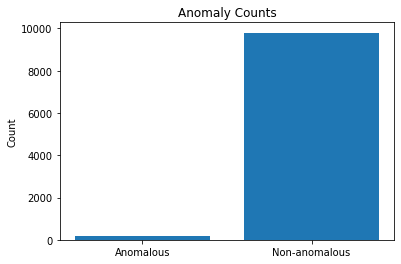

In [66]:
plt.bar(labels, anomaly_counts)
plt.title('Anomaly Counts')
plt.ylabel('Count')

In [67]:
svm_anomaly_index = y_pred[y_pred==1].index

In [68]:
svm_anomaly_index

Int64Index([ 591,  592,  651,  652, 1204, 1205, 1760, 1776, 1778, 1789,
            ...
            8840, 8843, 8846, 8849, 8851, 8854, 8858, 8861, 8863, 9629],
           dtype='int64', length=201)

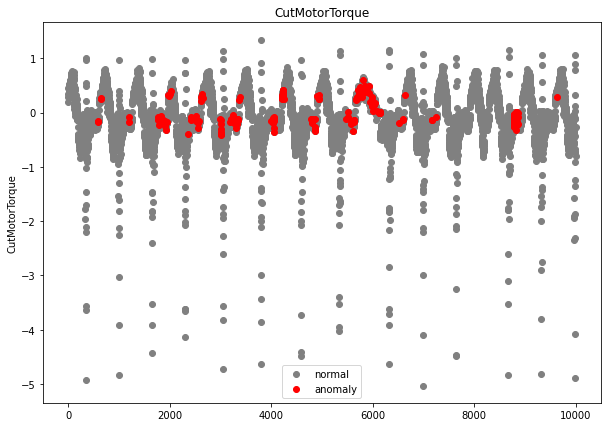

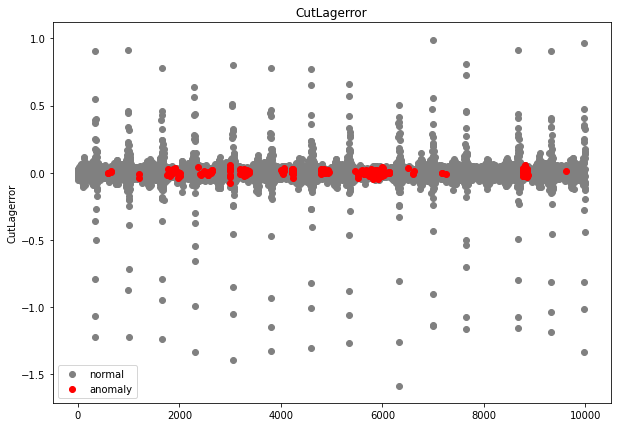

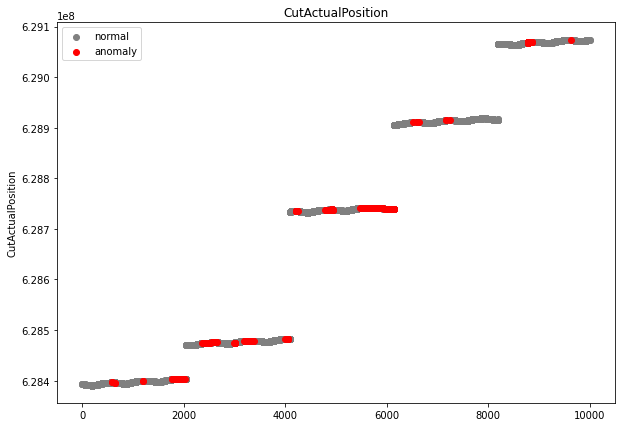

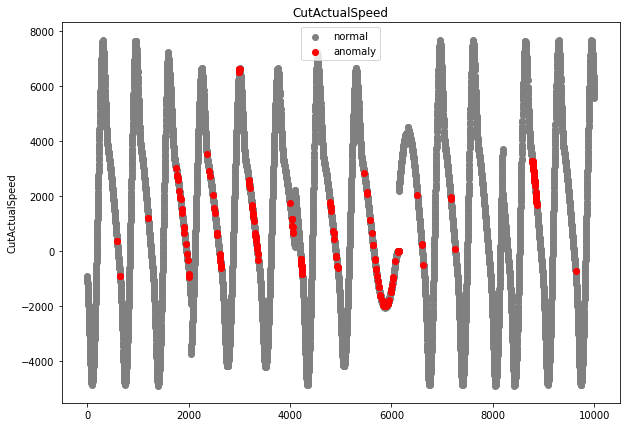

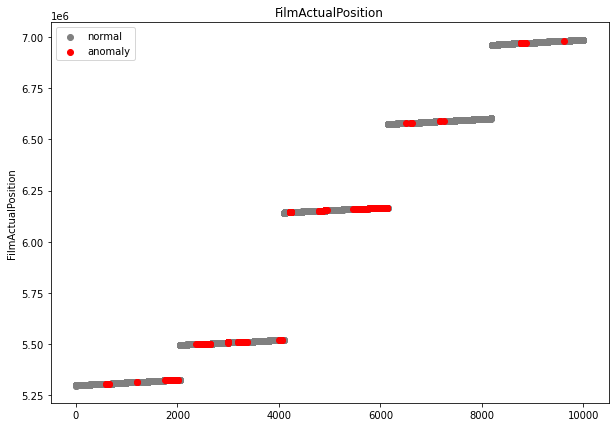

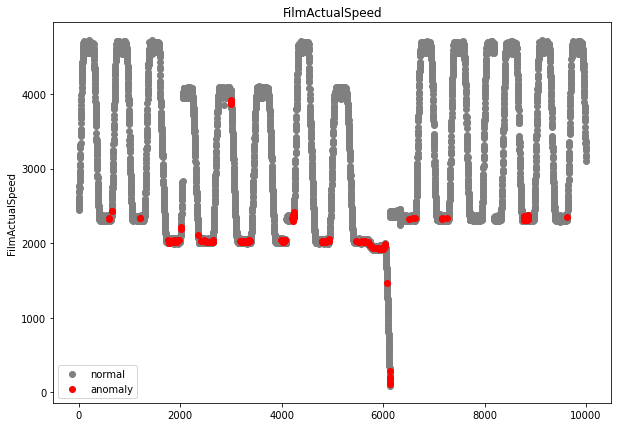

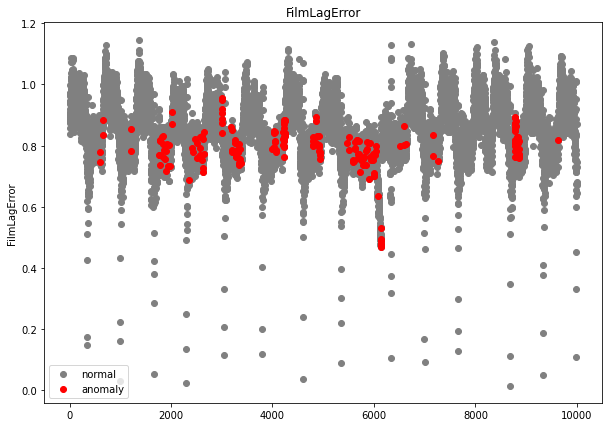

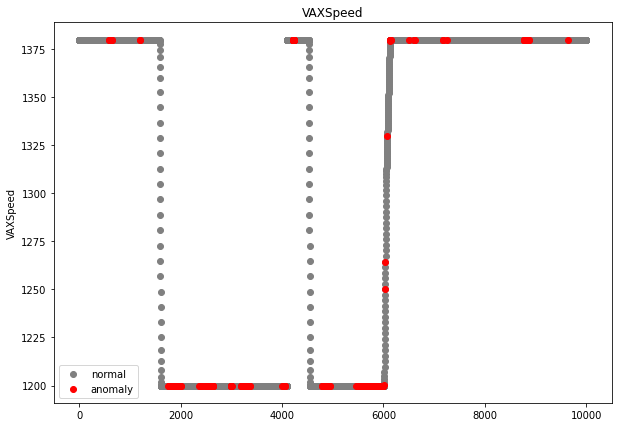

In [69]:
features = ['CutMotorTorque', 'CutLagerror', 'CutActualPosition', 'CutActualSpeed', 'FilmActualPosition', 'FilmActualSpeed', 'FilmLagError', 'VAXSpeed']
for feature in features:
    plt.figure(figsize=(10,7))
    plt.scatter(svm_data.index,svm_data[feature],c='grey', label = 'normal')
    plt.scatter(svm_anomaly_index,svm_data.iloc[svm_anomaly_index][feature],c='red', label='anomaly')
    plt.ylabel(feature)
    plt.title(feature)
    plt.legend()

<b>Performing DBSCAN, IF, One Class SVM for entire dataset</b>

In [8]:
comparing_data = full_data.copy()
model_data = comparing_data.drop(['Time', 'Time Elapsed', 'Mode'],axis=1)

In [71]:
# DBSCAN
clusters  = DBSCAN(eps = 0.2, metric='euclidean', min_samples = 5, n_jobs = -1).fit_predict(model_data)
clusters = list(clusters)

In [72]:
db_anomalies = []
for x in clusters:
    if x==-1:
        db_anomalies.append(1)
    else:
        db_anomalies.append(0)

In [73]:
pd.Series(db_anomalies).value_counts()

1    1062336
0        576
dtype: int64

In [9]:
# Isolation Forest
rs = np.random.RandomState(0)
clf = IsolationForest(max_samples=100, random_state=rs, contamination=.1) 
clf.fit(model_data)
if_scores = clf.decision_function(model_data)
if_anomalies = clf.predict(model_data)

if_anomalies = pd.Series(if_anomalies).replace([-1,1],[1,0])

In [75]:
if_anomalies.value_counts()

0    956620
1    106292
dtype: int64

<b>One Class SVM was found to be time consuming and hence is not implememted for the entire dataset</b>

# Analysis based on IF
<b>Since isolation forests was a better model in terms of time, further analysis will be done wrt IF</b>

In [28]:
data = full_data.copy()
data['Anomaly'] = if_anomalies
data['Anomaly Score'] = if_scores

In [29]:
data

,Time,Time Elapsed,CutMotorTorque,CutLagerror,CutActualPosition,CutActualSpeed,FilmActualPosition,FilmActualSpeed,FilmLagError,VAXSpeed,Mode,Anomaly,Anomaly Score
0,2000/01/04 18:41:48.008,0.008000,0.199603,0.027420,628392628,-920.104980,5298555,2441.235352,0.899543,1379.999756,1,0,0.128525
1,2000/01/04 18:41:48.011,0.012000,0.281624,0.002502,628392625,-937.271118,5298565,2453.819092,0.874072,1379.999756,1,0,0.133237
2,2000/01/04 18:41:48.015,0.016000,0.349315,-0.018085,628392621,-951.004028,5298575,2476.469727,0.879806,1379.999756,1,0,0.130823
3,2000/01/04 18:41:48.019,0.020000,0.444450,-0.054680,628392617,-1019.668579,5298585,2501.637207,0.837500,1379.999756,1,0,0.102055
4,2000/01/04 18:41:48.023,0.024000,0.480923,-0.042770,628392613,-1023.101807,5298595,2519.254395,0.905347,1379.999756,1,0,0.109986
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062907,2000/12/28 18:59:17.179,8.179999,-0.277697,-0.023948,194924473,7220.077148,11693928,4610.663086,0.958136,1499.999756,2,0,0.160248
1062908,2000/12/28 18:59:17.183,8.183999,-0.285098,-0.022138,194924502,7257.842773,11693946,4618.213379,0.971821,1499.999756,2,0,0.161726
1062909,2000/12/28 18:59:17.187,8.187999,-0.155192,-0.034412,194924531,7371.139160,11693964,4582.979004,0.981734,1499.999756,2,0,0.156914
1062910,2000/12/28 18:59:17.191,8.191999,-0.371426,0.031594,194924560,7360.839844,11693983,4615.696777,0.987367,1499.999756,2,0,0.157968


In [30]:
month = []
for i in data.index:
    date = data['Time'][i]
    month.append(int(date[5:7]))

In [31]:
pd.Series(month).value_counts()

1     194560
2     153600
8     131072
4     126976
10     90112
7      77824
3      65536
6      59392
11     53248
12     43008
5      40960
9      26624
dtype: int64

In [32]:
data.insert(loc=2, column='Month', value=month)

In [81]:
data

,Time,Time Elapsed,Month,CutMotorTorque,CutLagerror,CutActualPosition,CutActualSpeed,FilmActualPosition,FilmActualSpeed,FilmLagError,VAXSpeed,Mode,Anomaly,Anomaly Score
0,2000/01/04 18:41:48.008,0.008000,1,0.199603,0.027420,628392628,-920.104980,5298555,2441.235352,0.899543,1379.999756,1,0,0.128525
1,2000/01/04 18:41:48.011,0.012000,1,0.281624,0.002502,628392625,-937.271118,5298565,2453.819092,0.874072,1379.999756,1,0,0.133237
2,2000/01/04 18:41:48.015,0.016000,1,0.349315,-0.018085,628392621,-951.004028,5298575,2476.469727,0.879806,1379.999756,1,0,0.130823
3,2000/01/04 18:41:48.019,0.020000,1,0.444450,-0.054680,628392617,-1019.668579,5298585,2501.637207,0.837500,1379.999756,1,0,0.102055
4,2000/01/04 18:41:48.023,0.024000,1,0.480923,-0.042770,628392613,-1023.101807,5298595,2519.254395,0.905347,1379.999756,1,0,0.109986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062907,2000/12/28 18:59:17.179,8.179999,12,-0.277697,-0.023948,194924473,7220.077148,11693928,4610.663086,0.958136,1499.999756,2,0,0.160248
1062908,2000/12/28 18:59:17.183,8.183999,12,-0.285098,-0.022138,194924502,7257.842773,11693946,4618.213379,0.971821,1499.999756,2,0,0.161726
1062909,2000/12/28 18:59:17.187,8.187999,12,-0.155192,-0.034412,194924531,7371.139160,11693964,4582.979004,0.981734,1499.999756,2,0,0.156914
1062910,2000/12/28 18:59:17.191,8.191999,12,-0.371426,0.031594,194924560,7360.839844,11693983,4615.696777,0.987367,1499.999756,2,0,0.157968


In [82]:
data.to_csv('IF Analysis.csv')

<b>Visualising amomalies - MONTHWISE</b>

In [34]:
month1 = data[data['Month']==1]
month2 = data[data['Month']==2]
month3 = data[data['Month']==3]
month4 = data[data['Month']==4]
month5 = data[data['Month']==5]
month6 = data[data['Month']==6]
month7 = data[data['Month']==7]
month8 = data[data['Month']==8]
month9 = data[data['Month']==9]
month10 = data[data['Month']==10]
month11 = data[data['Month']==11]
month12 = data[data['Month']==12]
month_data = [month1, month2, month3, month4, month5, month6, month7, month8, month9, month10, month11, month12]

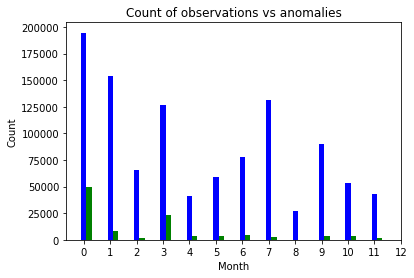

In [84]:
# for each month, let us compare number of observations and its corresponding anomalies

observations = [len(x) for x in month_data]
anomalies = []
months = [1,2,3,4,5,6,7,8,9,10,11,12]
for d in month_data:
    a = d['Anomaly']
    val = a.value_counts()[1]
    anomalies.append(val)

barwidth = 0.2
r1 = np.arange(len(months))
r2 = [x + barwidth for x in r1]
plt.bar(r1, observations, width=0.2, color='b', align='center')
plt.bar(r2, anomalies, width=0.2, color='g', align='center')
plt.xticks(np.arange(len(months)+1))
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of observations vs anomalies')
plt.show()

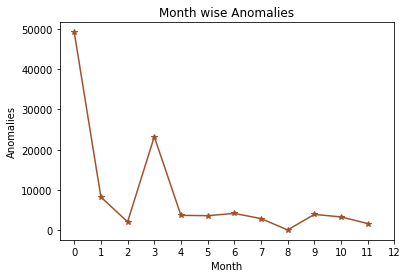

In [85]:
# only amomalies

plt.plot(anomalies, '-*', color='sienna')
plt.xticks(np.arange(len(months)+1))
plt.xlabel('Month')
plt.ylabel('Anomalies')
plt.title('Month wise Anomalies')
plt.show()

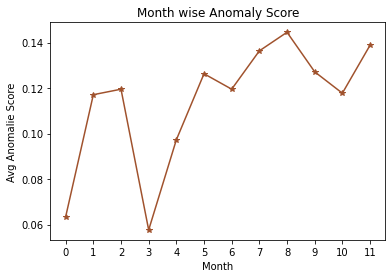

In [52]:
# for each month, let us compare number of observations and its corresponding anomalies
from statistics import mean

anomaly_scores = []
months = [1,2,3,4,5,6,7,8,9,10,11,12]
for d in month_data:
    a = d['Anomaly Score']
    anomaly_scores.append(mean(a))

plt.plot(anomaly_scores, '-*', color='sienna')
plt.xticks(np.arange(len(months)))
plt.xlabel('Month')
plt.ylabel('Avg Anomalie Score')
plt.title('Month wise Anomaly Score')
plt.show()

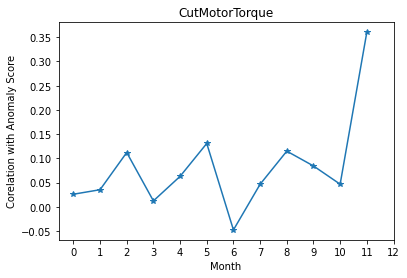

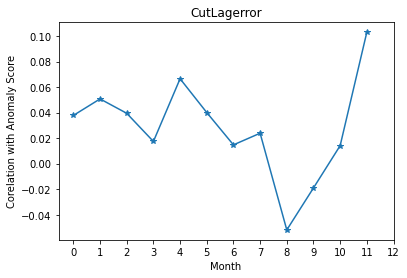

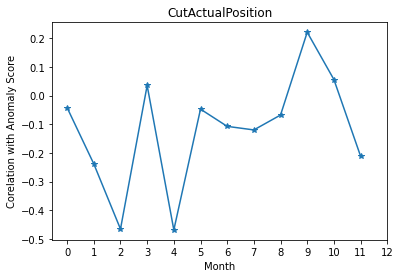

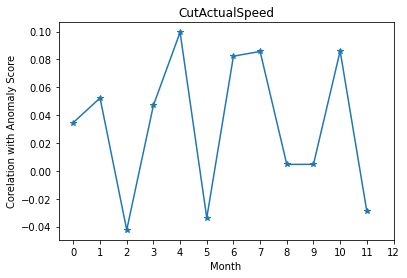

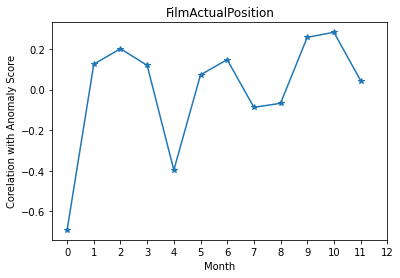

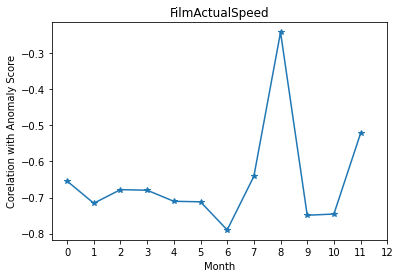

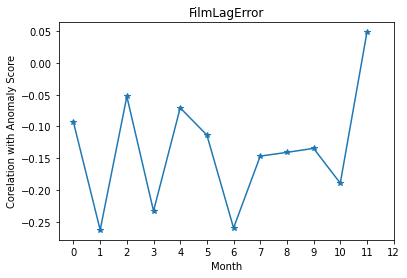

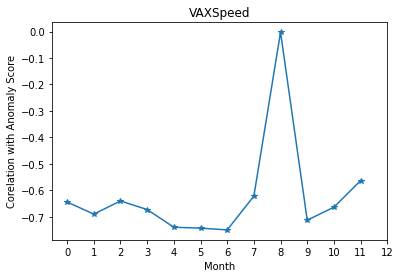

In [87]:
# visualising each factor's effet on the anomaly monthwise

features = list(data.columns)
month = ['Month1', 'Month2', 'Month3', 'Month4', 'Month5', 'Month6', 'Month7', 'Month8','Month9','Month10', 'Month11','Month12']
for feature in features:
    if feature in ['Time', 'Time Elapsed', 'Mode', 'Month', 'Anomaly', 'Anomaly Score']:
        continue
    correlation = []
    for d, m in zip(month_data, month):
        anomaly_score = d['Anomaly Score']
        feature_data = d[feature]
        correlation.append(feature_data.corr(anomaly_score))
    plt.plot(correlation, '-*')
    plt.xticks(np.arange(len(months)+1))
    plt.xlabel('Month')
    plt.ylabel('Corelation with Anomaly Score')
    plt.title(feature)
    plt.show()

<b>Calculating and visualising anomaly score for ecah feature monthwise</b>

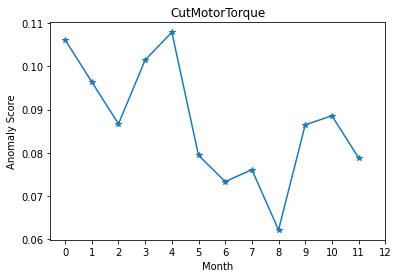

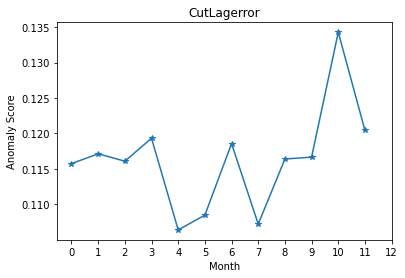

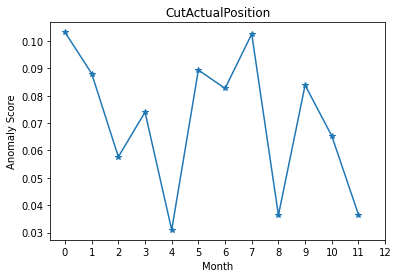

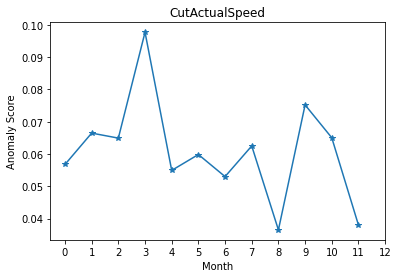

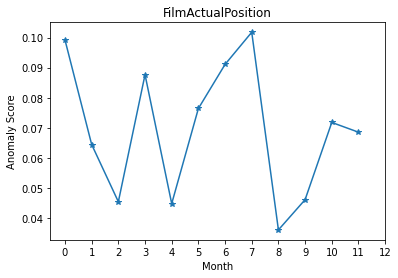

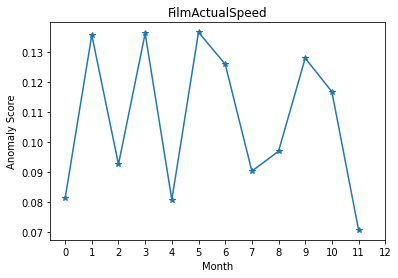

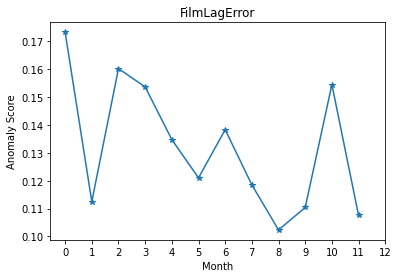

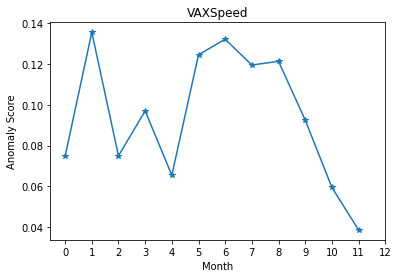

In [43]:
from statistics import mean

features = list(data.columns)
month = ['Month1', 'Month2', 'Month3', 'Month4', 'Month5', 'Month6', 'Month7', 'Month8','Month9','Month10', 'Month11','Month12']
for feature in features:
    if feature in ['Time', 'Time Elapsed', 'Mode', 'Month', 'Anomaly', 'Anomaly Score']:
        continue
    
    avg_scores = []
    for d in month_data:
        subdata = pd.DataFrame(d[feature])
        rs = np.random.RandomState(0)
        clf = IsolationForest(max_samples=100, random_state=rs, contamination=.1) 
        clf.fit(subdata)
        scores = list(clf.decision_function(subdata))
        avg_scores.append(mean(scores))
    
    plt.plot(avg_scores, '-*')
    plt.xticks(np.arange(1, len(month)+1))
    plt.xlabel('Month')
    plt.ylabel('Anomaly Score')
    plt.title(feature)
    plt.show()

# Mode wise analysis

In [33]:
mode_data = pd.read_csv('IF Analysis.csv')

In [34]:
mode_data = mode_data.drop('Unnamed: 0', axis=1)

In [30]:
mode_data['Anomaly Score'] = 0
mode_data['Anomaly'] = 0

In [31]:
mode_data.head()

,Time,Time Elapsed,Month,CutMotorTorque,CutLagerror,CutActualPosition,CutActualSpeed,FilmActualPosition,FilmActualSpeed,FilmLagError,VAXSpeed,Mode,Anomaly,Anomaly Score
0,2000/01/04 18:41:48.008,0.008,1,0.199603,0.027420,628392628,-920.104980,5298555,2441.235352,0.899543,1379.999756,1,0,0
1,2000/01/04 18:41:48.011,0.012,1,0.281624,0.002502,628392625,-937.271118,5298565,2453.819092,0.874072,1379.999756,1,0,0
2,2000/01/04 18:41:48.015,0.016,1,0.349315,-0.018085,628392621,-951.004028,5298575,2476.469727,0.879806,1379.999756,1,0,0
3,2000/01/04 18:41:48.019,0.020,1,0.444450,-0.054680,628392617,-1019.668579,5298585,2501.637207,0.837500,1379.999756,1,0,0
4,2000/01/04 18:41:48.023,0.024,1,0.480923,-0.042770,628392613,-1023.101807,5298595,2519.254395,0.905347,1379.999756,1,0,0


In [35]:
mode1 = mode_data[mode_data['Mode']==1]
mode2 = mode_data[mode_data['Mode']==2]
mode3 = mode_data[mode_data['Mode']==3]
mode4 = mode_data[mode_data['Mode']==4]
mode5 = mode_data[mode_data['Mode']==5]
mode6 = mode_data[mode_data['Mode']==6]
mode7 = mode_data[mode_data['Mode']==7]
mode8 = mode_data[mode_data['Mode']==8]

modeData = [mode1, mode2, mode3, mode4, mode5, mode6, mode7, mode8]

In [57]:
mode1

,Time,Time Elapsed,Month,CutMotorTorque,CutLagerror,CutActualPosition,CutActualSpeed,FilmActualPosition,FilmActualSpeed,FilmLagError,VAXSpeed,Mode,Anomaly,Anomaly Score
0,2000/01/04 18:41:48.008,0.008000,1,0.199603,0.027420,628392628,-920.104980,5298555,2441.235352,0.899543,1379.999756,1,0,0.128525
1,2000/01/04 18:41:48.011,0.012000,1,0.281624,0.002502,628392625,-937.271118,5298565,2453.819092,0.874072,1379.999756,1,0,0.133237
2,2000/01/04 18:41:48.015,0.016000,1,0.349315,-0.018085,628392621,-951.004028,5298575,2476.469727,0.879806,1379.999756,1,0,0.130823
3,2000/01/04 18:41:48.019,0.020000,1,0.444450,-0.054680,628392617,-1019.668579,5298585,2501.637207,0.837500,1379.999756,1,0,0.102055
4,2000/01/04 18:41:48.023,0.024000,1,0.480923,-0.042770,628392613,-1023.101807,5298595,2519.254395,0.905347,1379.999756,1,0,0.109986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054715,2000/12/25 18:9:0.179,8.179999,12,0.393053,-0.019344,36069412,-1016.235352,91516463,2562.039062,0.871846,1499.999756,1,0,0.145169
1054716,2000/12/25 18:9:0.183,8.183999,12,0.415674,-0.012012,36069408,-1026.535034,91516473,2534.354736,0.924133,1499.999756,1,0,0.147108
1054717,2000/12/25 18:9:0.187,8.187999,12,0.368944,0.001564,36069404,-1050.567627,91516483,2539.388428,0.846560,1499.999756,1,0,0.147509
1054718,2000/12/25 18:9:0.191,8.191999,12,0.328232,0.009434,36069400,-1098.632812,91516493,2526.804688,0.858582,1499.999756,1,0,0.150891


Mode1


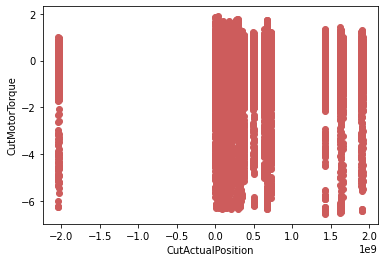

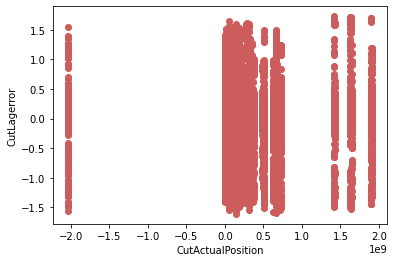

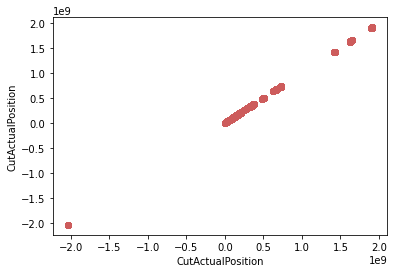

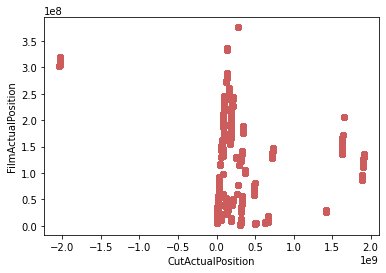

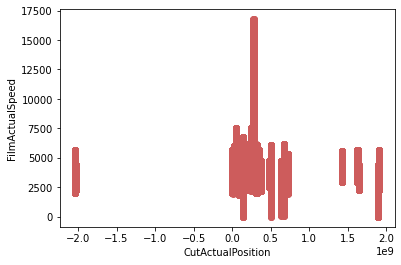

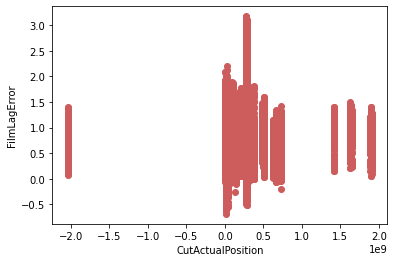

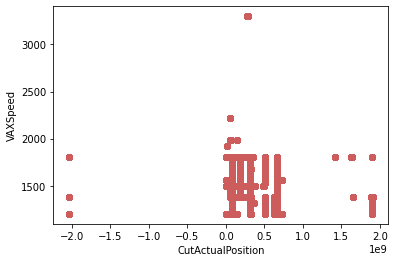

Mode2


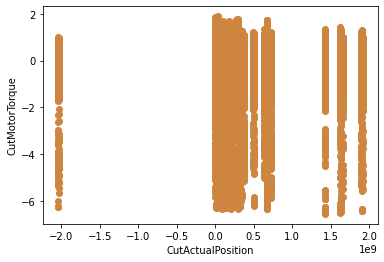

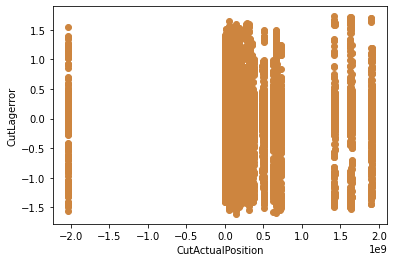

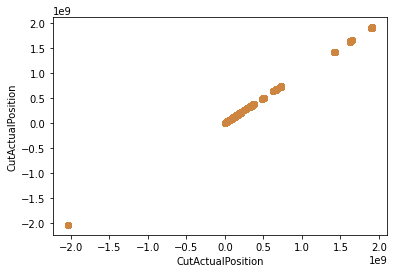

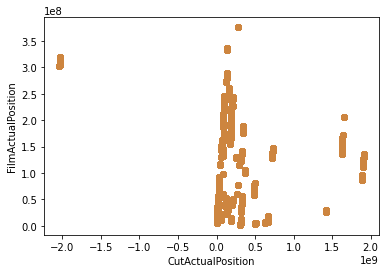

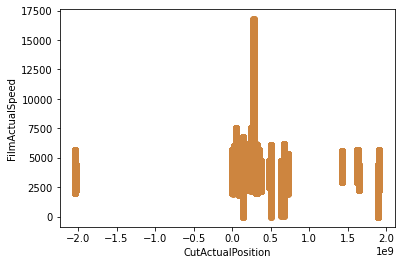

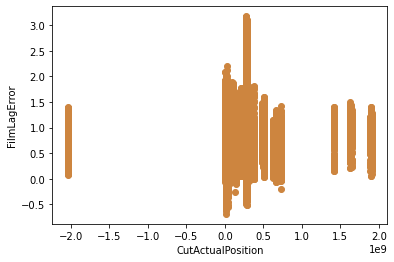

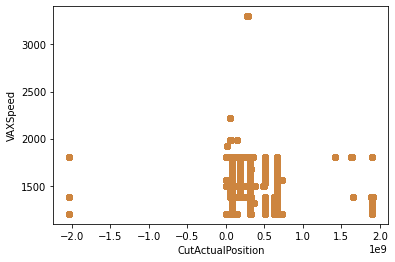

Mode3


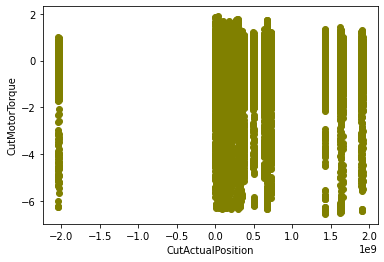

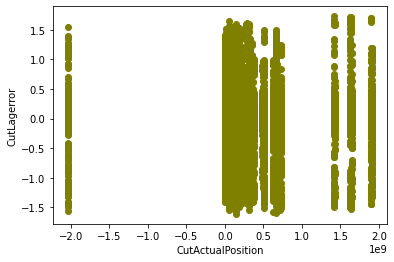

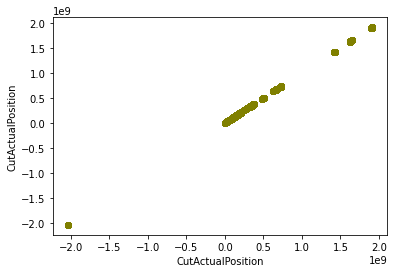

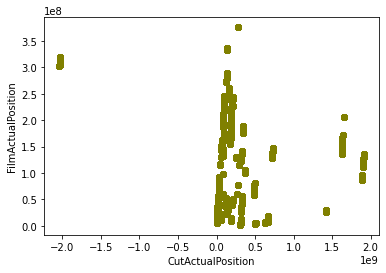

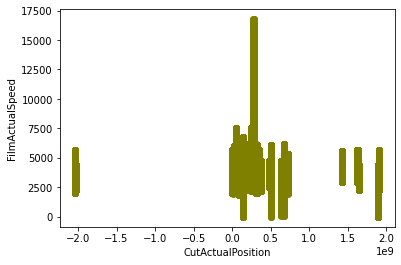

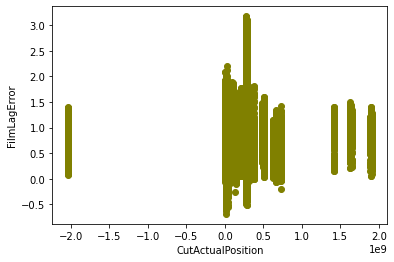

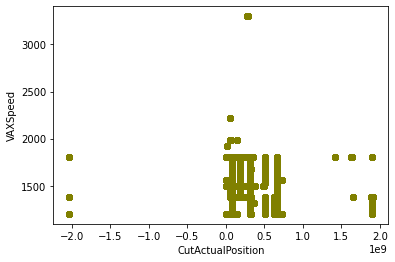

Mode4


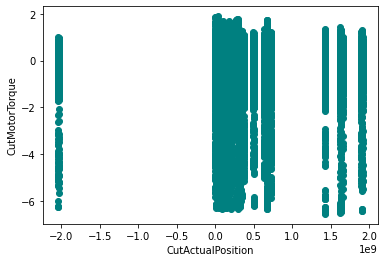

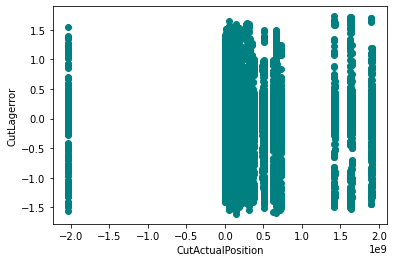

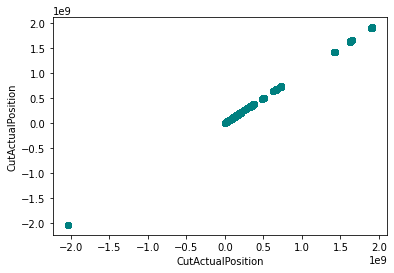

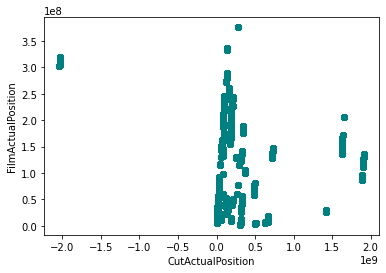

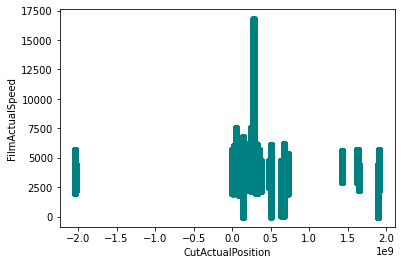

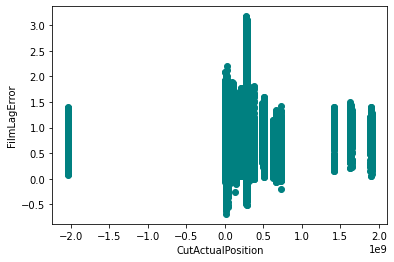

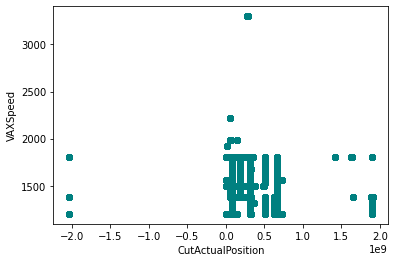

Mode5


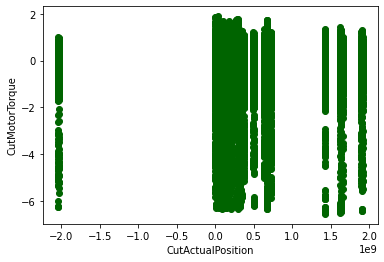

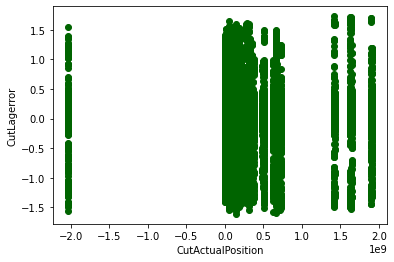

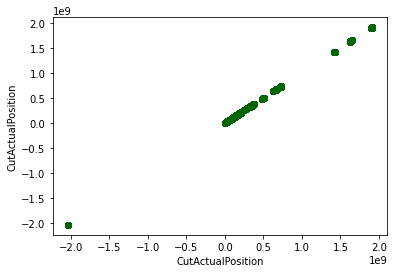

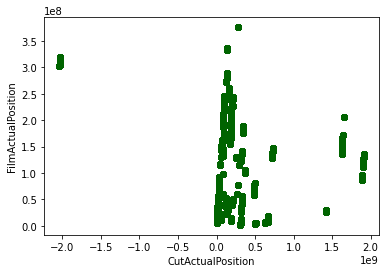

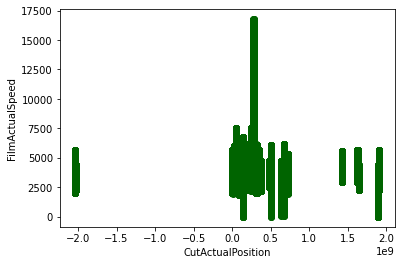

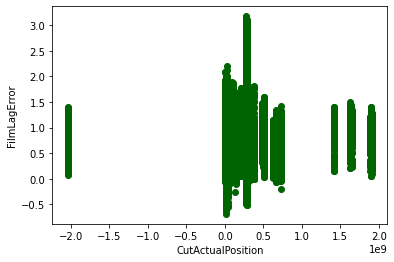

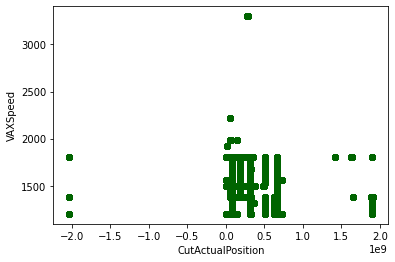

Mode6


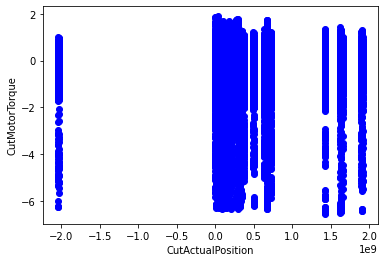

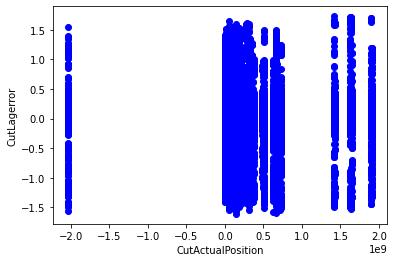

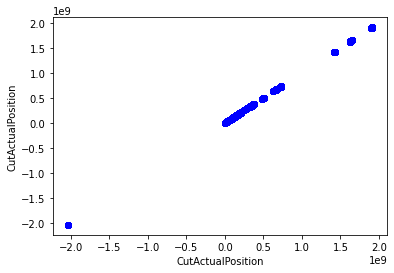

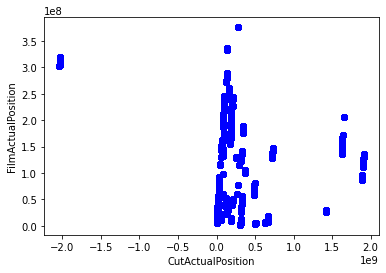

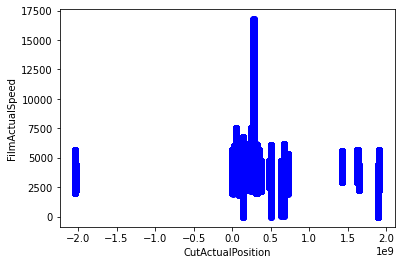

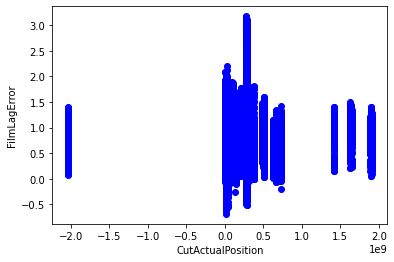

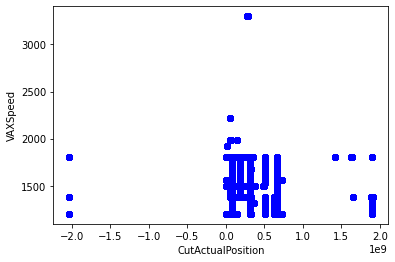

Mode7


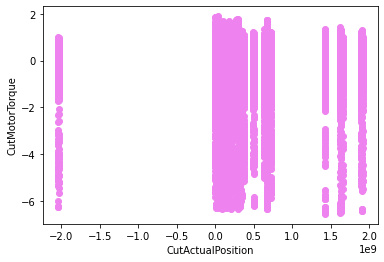

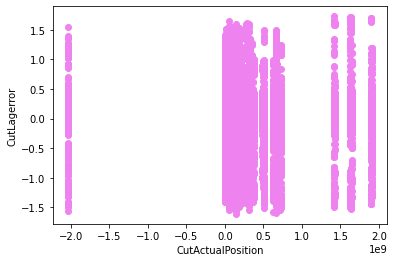

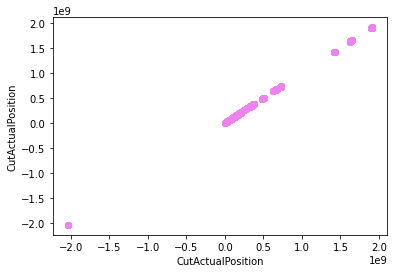

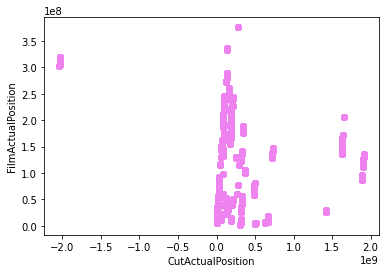

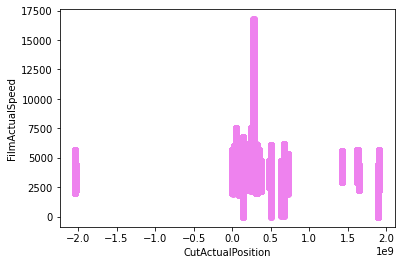

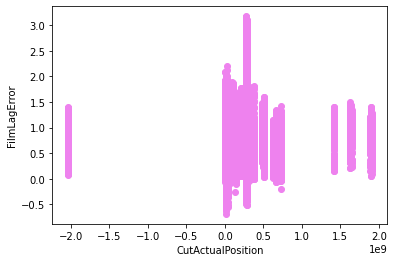

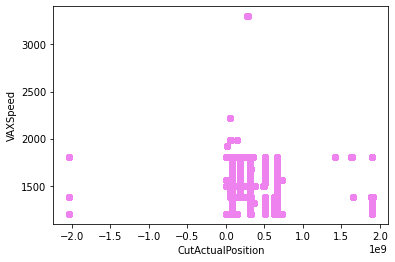

Mode8


IndexError: list index out of range

In [37]:
# analysing mode1 
features = ['CutMotorTorque', 'CutLagerror', 'CutActualPosition', 'FilmActualPosition', 'FilmActualSpeed', 'FilmLagError', 'VAXSpeed']
cols = ['indianred', 'peru', 'olive', 'teal', 'darkgreen', 'blue', 'violet']
i = -1
for mode in modeData:
    i += 1
    print('Mode' + str(i+1))
    for feature in features:
        plt.scatter(mode['CutActualPosition'], mode[feature], color=cols[i])
        plt.xlabel('CutActualPosition')
        plt.ylabel(feature)
        plt.show()
    break

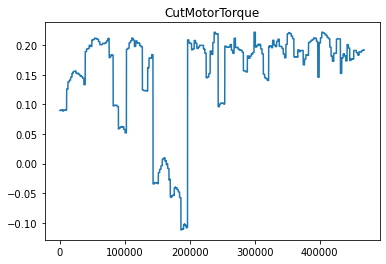

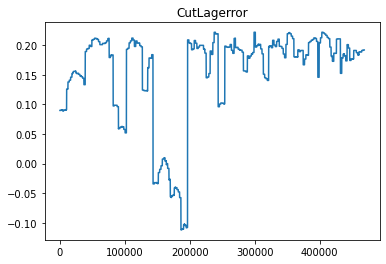

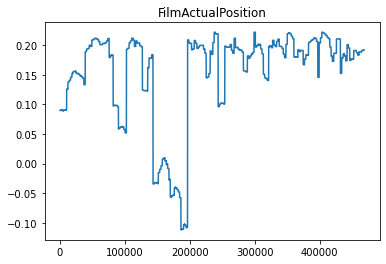

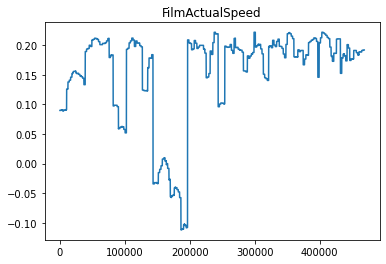

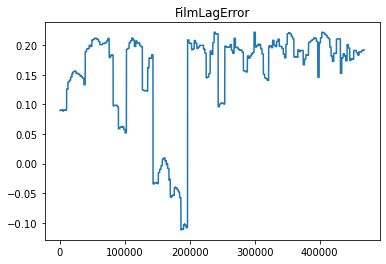

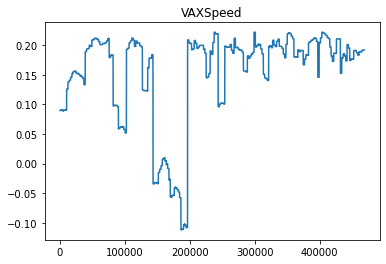

In [71]:
# for mode1
features = ['CutMotorTorque', 'CutLagerror', 'FilmActualPosition', 'FilmActualSpeed', 'FilmLagError', 'VAXSpeed']
for feature in features:
    temp = pd.DataFrame(list(mode1['CutActualPosition']), list(mode1[feature]))
    rs = np.random.RandomState(0)
    clf = IsolationForest(max_samples=100, random_state=rs, contamination=.1) 
    clf.fit(temp)
    if_scores = clf.decision_function(temp)
    plt.plot(if_scores)
    plt.title(feature)    
    plt.show()

# Visulaising trend month wise

In [14]:
month_data = full_data.copy()

In [16]:
month = []
for i in month_data.index:
    month_date = month_data['Time'][i]
    month.append(int(month_date[5:7]))

In [17]:
pd.Series(month).value_counts()

1     194560
2     153600
8     131072
4     126976
10     90112
7      77824
3      65536
6      59392
11     53248
12     43008
5      40960
9      26624
dtype: int64

In [18]:
month_data.insert(loc=2, column='Month', value=month)

In [19]:
month1 = month_data[month_data['Month']==1]
month2 = month_data[month_data['Month']==2]
month3 = month_data[month_data['Month']==3]
month4 = month_data[month_data['Month']==4]
month5 = month_data[month_data['Month']==5]
month6 = month_data[month_data['Month']==6]
month7 = month_data[month_data['Month']==7]
month8 = month_data[month_data['Month']==8]
month9 = month_data[month_data['Month']==9]
month10 = month_data[month_data['Month']==10]
month11 = month_data[month_data['Month']==11]
month12 = month_data[month_data['Month']==12]
month_data = [month1, month2, month3, month4, month5, month6, month7, month8, month9, month10, month11, month12]

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

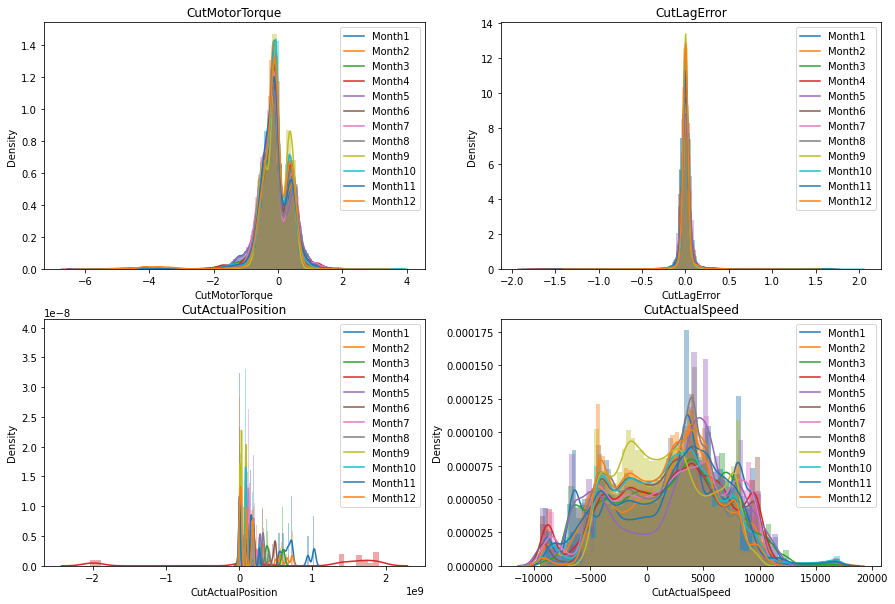

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for month in month_data:
    sns.distplot(month['CutMotorTorque'], ax=axes[0][0])
    sns.distplot(month['CutLagError'], ax=axes[0][1])
    sns.distplot(month['CutActualPosition'], ax=axes[1][0])
    sns.distplot(month['CutActualSpeed'], ax=axes[1][1])
    
axes[0][0].title.set_text('CutMotorTorque')
axes[0][1].title.set_text('CutLagError')
axes[1][0].title.set_text('CutActualPosition')
axes[1][1].title.set_text('CutActualSpeed')

axes[0][0].legend(['Month1', 'Month2', 'Month3', 'Month4', 'Month5', 'Month6', 'Month7', 'Month8', 'Month9', 'Month10', 'Month11', 'Month12'])
axes[0][1].legend(['Month1', 'Month2', 'Month3', 'Month4', 'Month5', 'Month6', 'Month7', 'Month8', 'Month9', 'Month10', 'Month11', 'Month12'])
axes[1][0].legend(['Month1', 'Month2', 'Month3', 'Month4', 'Month5', 'Month6', 'Month7', 'Month8', 'Month9', 'Month10', 'Month11', 'Month12'])
axes[1][1].legend(['Month1', 'Month2', 'Month3', 'Month4', 'Month5', 'Month6', 'Month7', 'Month8', 'Month9', 'Month10', 'Month11', 'Month12'])
plt.show()